# Exploratory Data Analysis on AMEO Dataset

## Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

## Objective

The objective of this Analysis is to gain insights and understanding from the provided dataset, particularly focusing on the relationship between various features and the target variable, which is Salary.

Specifically, the goals of this analysis include:

Describing the dataset and its features comprehensively.
Identifying any patterns or trends present in the data.
Exploring the relationships between independent variables and the target variable (Salary).
Identifying any outliers or anomalies in the data.


# Importing file

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import re

In [3]:
df = pd.read_csv("data.xlsx_-_Sheet1.csv")

In [5]:
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

###  Dropping unwanted columns

In [6]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [7]:
df.head()

ID     Salary          DOJ          DOL               Designation  \
0  203097   420000.0  6/1/12 0:00      present   senior quality engineer   
1  579905   500000.0  9/1/13 0:00      present         assistant manager   
2  810601   325000.0  6/1/14 0:00      present          systems engineer   
3  267447  1100000.0  7/1/11 0:00      present  senior software engineer   
4  343523   200000.0  3/1/14 0:00  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...               -1              -1   
1                            cbse  ...               -1              -1   
2                            cbse  ...               -1              -1   
3                            cbse  ...               -1              -1   
4                            cbse  ...               -1              -1   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
0             -1           -1         -1            0.9737        0.8128   
1             -1           -1         -1           -0.7335        0.3789   
2             -1           -1         -1            0.2718        1.7109   
3             -1           -1         -1            0.0464        0.3448   
4             -1           -1         -1           -0.8810       -0.2793   

   extraversion  nueroticism  openess_to_experience  
0        0.5269      1.35490                -0.4455  
1        1.2396     -0.10760                 0.8637  
2        0.1637     -0.86820                 0.6721  
3       -0.3440     -0.40780                -0.9194  
4       -1.0697      0.09163                -0.1295  

[5 rows x 38 columns]

#### Step - 1 - Introduction -> Give a detailed data description and objective


In [8]:
df.shape

(3998, 38)

In [9]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [11]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [12]:
df.columns = df.columns.str.strip()

In [13]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

#### Fixing the Type of column

In [14]:
df.head(10)

ID     Salary          DOJ          DOL               Designation  \
0   203097   420000.0  6/1/12 0:00      present   senior quality engineer   
1   579905   500000.0  9/1/13 0:00      present         assistant manager   
2   810601   325000.0  6/1/14 0:00      present          systems engineer   
3   267447  1100000.0  7/1/11 0:00      present  senior software engineer   
4   343523   200000.0  3/1/14 0:00  3/1/15 0:00                       get   
5  1027655   300000.0  6/1/14 0:00      present           system engineer   
6   947847   300000.0  8/1/14 0:00  5/1/15 0:00    java software engineer   
7   912934   400000.0  7/1/14 0:00  7/1/15 0:00       mechanical engineer   
8   552574   600000.0  7/1/13 0:00      present       electrical engineer   
9  1203363   230000.0  7/1/14 0:00      present          project engineer   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00         84.30   
1     Indore      m  10/4/89 0:00         85.40   
2    Chennai      f   8/3/92 0:00         85.00   
3    Gurgaon      m  12/5/89 0:00         85.60   
4    Manesar      m  2/27/91 0:00         78.00   
5  Hyderabad      m   7/2/92 0:00         89.92   
6   Banglore      m   2/1/93 0:00         86.08   
7  Bangalore      m  5/27/92 0:00         92.00   
8      Noida      m  9/17/91 0:00         90.00   
9    Kolkata      m  6/13/93 0:00         77.00   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...               -1              -1   
1                            cbse  ...               -1              -1   
2                            cbse  ...               -1              -1   
3                            cbse  ...               -1              -1   
4                            cbse  ...               -1              -1   
5                     state board  ...              407              -1   
6                     state board  ...              346              -1   
7                            cbse  ...               -1             469   
8                            cbse  ...               -1              -1   
9                            cbse  ...               -1              -1   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
0             -1           -1         -1            0.9737        0.8128   
1             -1           -1         -1           -0.7335        0.3789   
2             -1           -1         -1            0.2718        1.7109   
3             -1           -1         -1            0.0464        0.3448   
4             -1           -1         -1           -0.8810       -0.2793   
5             -1           -1         -1           -0.3027       -0.6201   
6             -1           -1         -1            1.7081       -0.1054   
7             -1           -1         -1           -0.0154        1.2114   
8             -1           -1         -1           -0.1590        0.5454   
9             -1           -1         -1           -1.3080        0.5454   

   extraversion  nueroticism  openess_to_experience  
0        0.5269      1.35490                -0.4455  
1        1.2396     -0.10760                 0.8637  
2        0.1637     -0.86820                 0.6721  
3       -0.3440     -0.40780                -0.9194  
4       -1.0697      0.09163                -0.1295  
5       -2.2954     -0.74150                -0.8608  
6       -1.0379     -2.00920                -1.0872  
7        0.0100      0.14590                 1.2470  
8       -0.6048     -0.74150                -0.2859  
9       -0.9122      0.90660                 0.0973  

[10 rows x 38 columns]

In [15]:
df.describe(include = ['float64', 'int64'])

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [16]:
df.describe(include = "int64")

ID  12graduation     CollegeID  CollegeTier  CollegeCityID  \
count  3.998000e+03   3998.000000   3998.000000  3998.000000    3998.000000   
mean   6.637945e+05   2008.087544   5156.851426     1.925713    5156.851426   
std    3.632182e+05      1.653599   4802.261482     0.262270    4802.261482   
min    1.124400e+04   1995.000000      2.000000     1.000000       2.000000   
25%    3.342842e+05   2007.000000    494.000000     2.000000     494.000000   
50%    6.396000e+05   2008.000000   3879.000000     2.000000    3879.000000   
75%    9.904800e+05   2009.000000   8818.000000     2.000000    8818.000000   
max    1.298275e+06   2013.000000  18409.000000     2.000000   18409.000000   

       CollegeCityTier  GraduationYear      English      Logical        Quant  \
count      3998.000000     3998.000000  3998.000000  3998.000000  3998.000000   
mean          0.300400     2012.105803   501.649075   501.598799   513.378189   
std           0.458489       31.857271   104.940021    86.783297   122.302332   
min           0.000000        0.000000   180.000000   195.000000   120.000000   
25%           0.000000     2012.000000   425.000000   445.000000   430.000000   
50%           0.000000     2013.000000   500.000000   505.000000   515.000000   
75%           1.000000     2014.000000   570.000000   565.000000   595.000000   
max           1.000000     2017.000000   875.000000   795.000000   900.000000   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          3998.000000            3998.000000      3998.000000   
mean            353.102801              95.328414        90.742371   
std             205.355519             158.241218       175.273083   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             840.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  
count     3998.000000     3998.000000  3998.000000  3998.000000  
mean        22.974737       16.478739    31.851176     2.683842  
std         98.123311       87.585634   104.852845    36.658505  
min         -1.000000       -1.000000    -1.000000    -1.000000  
25%         -1.000000       -1.000000    -1.000000    -1.000000  
50%         -1.000000       -1.000000    -1.000000    -1.000000  
75%         -1.000000       -1.000000    -1.000000    -1.000000  
max        623.000000      676.000000   548.000000   516.000000

In [17]:
df.describe(include = "object")

DOJ      DOL        Designation    JobCity Gender  \
count          3998     3998               3998       3998   3998   
unique           81       67                419        339      2   
top     7/1/14 0:00  present  software engineer  Bangalore      m   
freq            199     1875                539        627   3041   

                DOB 10board 12board       Degree  \
count          3998    3998    3998         3998   
unique         1872     275     340            4   
top     1/1/91 0:00    cbse    cbse  B.Tech/B.E.   
freq             11    1395    1400         3700   

                                   Specialization   CollegeState  
count                                        3998           3998  
unique                                         46             26  
top     electronics and communication engineering  Uttar Pradesh  
freq                                          880            915

#### Duplicate values

In [18]:
df.duplicated().sum()

0

#### No duplicate values found

#### Find the Null values

In [19]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

<AxesSubplot:>

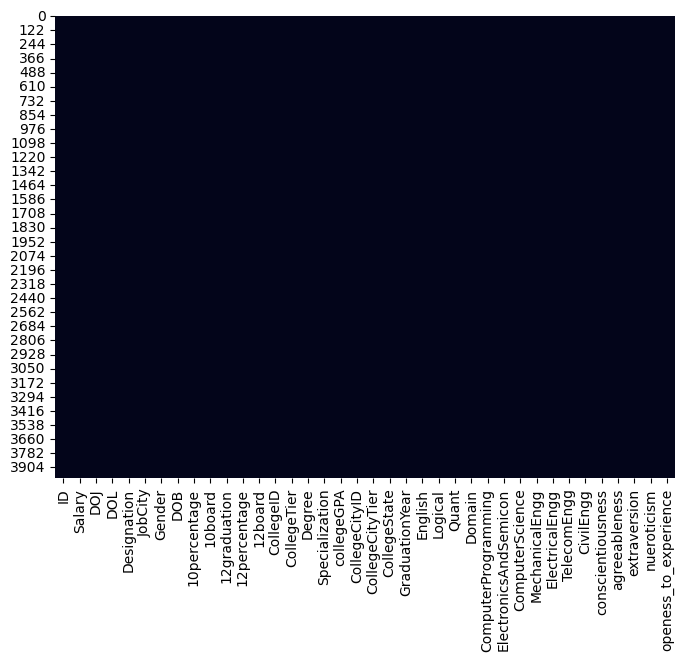

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar = False)

In [21]:
# Clearly visible from tha above heatmap and python code that we dont have any Null values.

In [22]:
# fixing DataType of  'DOB' column
df['DOB'] = pd.to_datetime(df['DOB'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   object        
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [23]:
# fixing  DataType of  'DOJ' column
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [24]:
# Replacing "present" with "present date" from "DOL" 
df['DOL'] = df['DOL'].replace('present', '20/02/2024')

In [25]:
print("\nDataFrame after replacement:")
print(df)


DataFrame after replacement:
          ID     Salary        DOJ           DOL                  Designation  \
0     203097   420000.0 2012-06-01    20/02/2024      senior quality engineer   
1     579905   500000.0 2013-09-01    20/02/2024            assistant manager   
2     810601   325000.0 2014-06-01    20/02/2024             systems engineer   
3     267447  1100000.0 2011-07-01    20/02/2024     senior software engineer   
4     343523   200000.0 2014-03-01   3/1/15 0:00                          get   
...      ...        ...        ...           ...                          ...   
3993   47916   280000.0 2011-10-01  10/1/12 0:00            software engineer   
3994  752781   100000.0 2013-07-01   7/1/13 0:00             technical writer   
3995  355888   320000.0 2013-07-01    20/02/2024  associate software engineer   
3996  947111   200000.0 2014-07-01   1/1/15 0:00           software developer   
3997  324966   400000.0 2013-02-01    20/02/2024      senior systems engineer  

In [26]:
# fixing  DataType of  'DOL' column
df['DOL'] = pd.to_datetime(df['DOL'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

C:\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/02/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


#### Check unique values in all columns

In [27]:
print("Unique Values in 'DOL'", list(df.DOL.unique()))

Unique Values in 'DOL' [numpy.datetime64('2024-02-20T00:00:00.000000000'), numpy.datetime64('2015-03-01T00:00:00.000000000'), numpy.datetime64('2015-05-01T00:00:00.000000000'), numpy.datetime64('2015-07-01T00:00:00.000000000'), numpy.datetime64('2015-04-01T00:00:00.000000000'), numpy.datetime64('2014-10-01T00:00:00.000000000'), numpy.datetime64('2014-09-01T00:00:00.000000000'), numpy.datetime64('2014-06-01T00:00:00.000000000'), numpy.datetime64('2012-09-01T00:00:00.000000000'), numpy.datetime64('2013-12-01T00:00:00.000000000'), numpy.datetime64('2015-06-01T00:00:00.000000000'), numpy.datetime64('2013-10-01T00:00:00.000000000'), numpy.datetime64('2015-01-01T00:00:00.000000000'), numpy.datetime64('2014-04-01T00:00:00.000000000'), numpy.datetime64('2013-06-01T00:00:00.000000000'), numpy.datetime64('2012-03-01T00:00:00.000000000'), numpy.datetime64('2014-07-01T00:00:00.000000000'), numpy.datetime64('2013-02-01T00:00:00.000000000'), numpy.datetime64('2014-01-01T00:00:00.000000000'), numpy.d

In [28]:
print("Unique Values in 'Gender", list(df.Gender.unique()))

Unique Values in 'Gender ['f', 'm']


In [29]:
print("Unique Values in 'Degree'", list(df.Degree.unique()))

Unique Values in 'Degree' ['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']


In [30]:
print("Unique Values in 'Specialization'", list(df.Specialization.unique()))

Unique Values in 'Specialization' ['computer engineering', 'electronics and communication engineering', 'information technology', 'computer science & engineering', 'mechanical engineering', 'electronics and electrical engineering', 'electronics & telecommunications', 'instrumentation and control engineering', 'computer application', 'electronics and computer engineering', 'electrical engineering', 'applied electronics and instrumentation', 'electronics & instrumentation eng', 'information science engineering', 'civil engineering', 'mechanical and automation', 'industrial & production engineering', 'control and instrumentation engineering', 'metallurgical engineering', 'electronics and instrumentation engineering', 'electronics engineering', 'ceramic engineering', 'chemical engineering', 'aeronautical engineering', 'other', 'biotechnology', 'embedded systems technology', 'electrical and power engineering', 'computer science and technology', 'mechatronics', 'automobile/automotive enginee

In [31]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [32]:
df.shape

(3998, 38)

In [181]:
x = df["Salary"].value_counts()


print(x)

300000.0     293
180000.0     239
200000.0     205
325000.0     188
120000.0     165
            ... 
2050000.0      1
144000.0       1
1320000.0      1
755000.0       1
925000.0       1
Name: Salary, Length: 177, dtype: int64


In [33]:
male = df["Gender"].value_counts()[0]
female = df["Gender"].value_counts()[1]
print(male)
print(female)

3041
957


In [34]:
df["Specialization"].value_counts()[1]

744

In [35]:
df["Specialization"].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [36]:
df["Quant"].value_counts()

605    143
485    130
545    125
575    116
515     99
      ... 
805      1
175      1
214      1
860      1
394      1
Name: Quant, Length: 138, dtype: int64

In [37]:
df["Domain"].value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

In [38]:
df["Degree"].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [39]:
df["Designation"].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [40]:
df["12graduation"].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [41]:
df["JobCity"].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [42]:
df.replace(-1, pd.NA, inplace=True)


print(df)

          ID     Salary        DOJ        DOL                  Designation  \
0     203097   420000.0 2012-06-01 2024-02-20      senior quality engineer   
1     579905   500000.0 2013-09-01 2024-02-20            assistant manager   
2     810601   325000.0 2014-06-01 2024-02-20             systems engineer   
3     267447  1100000.0 2011-07-01 2024-02-20     senior software engineer   
4     343523   200000.0 2014-03-01 2015-03-01                          get   
...      ...        ...        ...        ...                          ...   
3993   47916   280000.0 2011-10-01 2012-10-01            software engineer   
3994  752781   100000.0 2013-07-01 2013-07-01             technical writer   
3995  355888   320000.0 2013-07-01 2024-02-20  associate software engineer   
3996  947111   200000.0 2014-07-01 2015-01-01           software developer   
3997  324966   400000.0 2013-02-01 2024-02-20      senior systems engineer   

               JobCity Gender        DOB  10percentage  \
0    

In [43]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [44]:
df.replace([-1, 0], pd.NA, inplace=True)
df.head()

ID     Salary        DOJ        DOL               Designation  \
0  203097   420000.0 2012-06-01 2024-02-20   senior quality engineer   
1  579905   500000.0 2013-09-01 2024-02-20         assistant manager   
2  810601   325000.0 2014-06-01 2024-02-20          systems engineer   
3  267447  1100000.0 2011-07-01 2024-02-20  senior software engineer   
4  343523   200000.0 2014-03-01 2015-03-01                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   ...  ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  \
0  ...             <NA>            <NA>           <NA>         <NA>   
1  ...             <NA>            <NA>           <NA>         <NA>   
2  ...             <NA>            <NA>           <NA>         <NA>   
3  ...             <NA>            <NA>           <NA>         <NA>   
4  ...             <NA>            <NA>           <NA>         <NA>   

   CivilEngg conscientiousness agreeableness  extraversion  nueroticism  \
0       <NA>            0.9737        0.8128        0.5269      1.35490   
1       <NA>           -0.7335        0.3789        1.2396     -0.10760   
2       <NA>            0.2718        1.7109        0.1637     -0.86820   
3       <NA>            0.0464        0.3448       -0.3440     -0.40780   
4       <NA>           -0.8810       -0.2793       -1.0697      0.09163   

  openess_to_experience  
0               -0.4455  
1                0.8637  
2                0.6721  
3               -0.9194  
4               -0.1295  

[5 rows x 38 columns]

In [45]:
df["CollegeTier"].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

In [46]:
df["DOJ"].value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2015-11-01      1
2009-11-01      1
2004-08-01      1
2009-09-01      1
2007-02-01      1
Name: DOJ, Length: 81, dtype: int64

In [47]:
df["DOB"].value_counts()

1991-01-01    11
1991-07-15    10
1991-07-05     8
1991-12-13     8
1991-06-03     8
              ..
1992-12-30     1
1986-10-20     1
1989-11-17     1
1992-09-30     1
1987-04-15     1
Name: DOB, Length: 1872, dtype: int64

In [48]:
df["DOL"].value_counts()

2024-02-20    1875
2015-04-01     573
2015-03-01     124
2015-05-01     112
2015-01-01      99
              ... 
2005-03-01       1
2015-10-01       1
2010-02-01       1
2011-02-01       1
2010-10-01       1
Name: DOL, Length: 67, dtype: int64

In [49]:
df["English"].value_counts()

475    160
545    151
465    150
535    138
405    111
      ... 
180      1
875      1
825      1
870      1
334      1
Name: English, Length: 111, dtype: int64

In [50]:
df["ComputerProgramming"].value_counts()

445    151
435    144
475    139
465    134
455    131
      ... 
840      1
394      1
804      1
494      1
554      1
Name: ComputerProgramming, Length: 78, dtype: int64

In [51]:
df["openess_to_experience"].value_counts()

 0.6721    187
-0.0943    182
 0.0973    182
 0.4805    177
 0.2889    174
          ... 
-6.8009      1
 0.1187      1
-5.6860      1
-1.1291      1
-0.4229      1
Name: openess_to_experience, Length: 142, dtype: int64

In [52]:
df["nueroticism"].value_counts()

-0.48790    126
-0.74150    118
 0.01920    112
-0.61470    109
-0.36120    106
           ... 
 1.06113      1
-0.74960      1
 2.76500      1
 1.82493      1
 2.03060      1
Name: nueroticism, Length: 217, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [54]:
df[['MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].head(10)

MechanicalEngg ElectricalEngg TelecomEngg CivilEngg
0           <NA>           <NA>        <NA>      <NA>
1           <NA>           <NA>        <NA>      <NA>
2           <NA>           <NA>        <NA>      <NA>
3           <NA>           <NA>        <NA>      <NA>
4           <NA>           <NA>        <NA>      <NA>
5           <NA>           <NA>        <NA>      <NA>
6           <NA>           <NA>        <NA>      <NA>
7            469           <NA>        <NA>      <NA>
8           <NA>           <NA>        <NA>      <NA>
9           <NA>           <NA>        <NA>      <NA>

In [106]:
df['Tenure'] = df['DOL'] - df['DOJ']
df.head()

ID     Salary        DOJ        DOL               Designation  \
0  203097   420000.0 2012-06-01 2024-02-20   senior quality engineer   
1  579905   500000.0 2013-09-01 2024-02-20         assistant manager   
2  810601   325000.0 2014-06-01 2024-02-20          systems engineer   
3  267447  1100000.0 2011-07-01 2024-02-20  senior software engineer   
4  343523   200000.0 2014-03-01 2015-03-01                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   ...  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...            <NA>            <NA>        <NA>       <NA>   
1  ...            <NA>            <NA>        <NA>       <NA>   
2  ...            <NA>            <NA>        <NA>       <NA>   
3  ...            <NA>            <NA>        <NA>       <NA>   
4  ...            <NA>            <NA>        <NA>       <NA>   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience    Tenure  
0                -0.4455 4281 days  
1                 0.8637 3824 days  
2                 0.6721 3551 days  
3                -0.9194 4617 days  
4                -0.1295  365 days  

[5 rows x 39 columns]

### Univariate Analysis
### Continuous Features


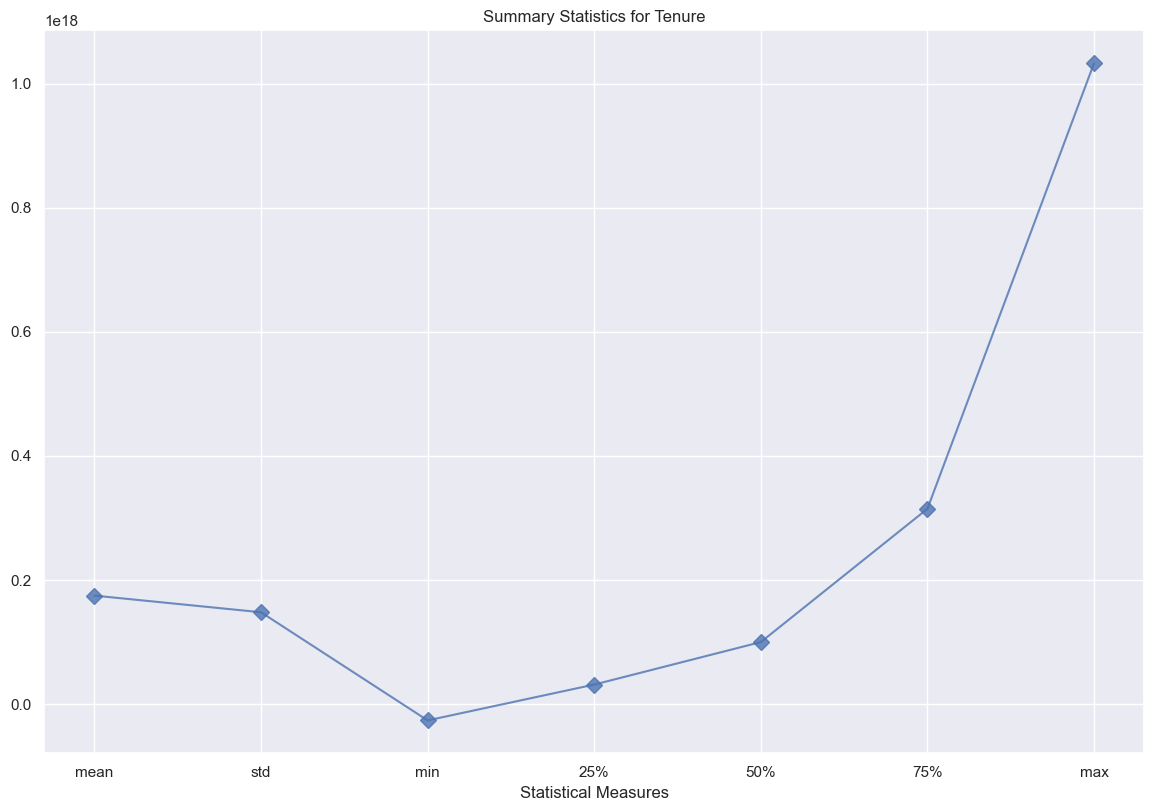

In [108]:
df['Tenure'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

In [111]:
df['Tenure'] = df['Tenure'].dt.days

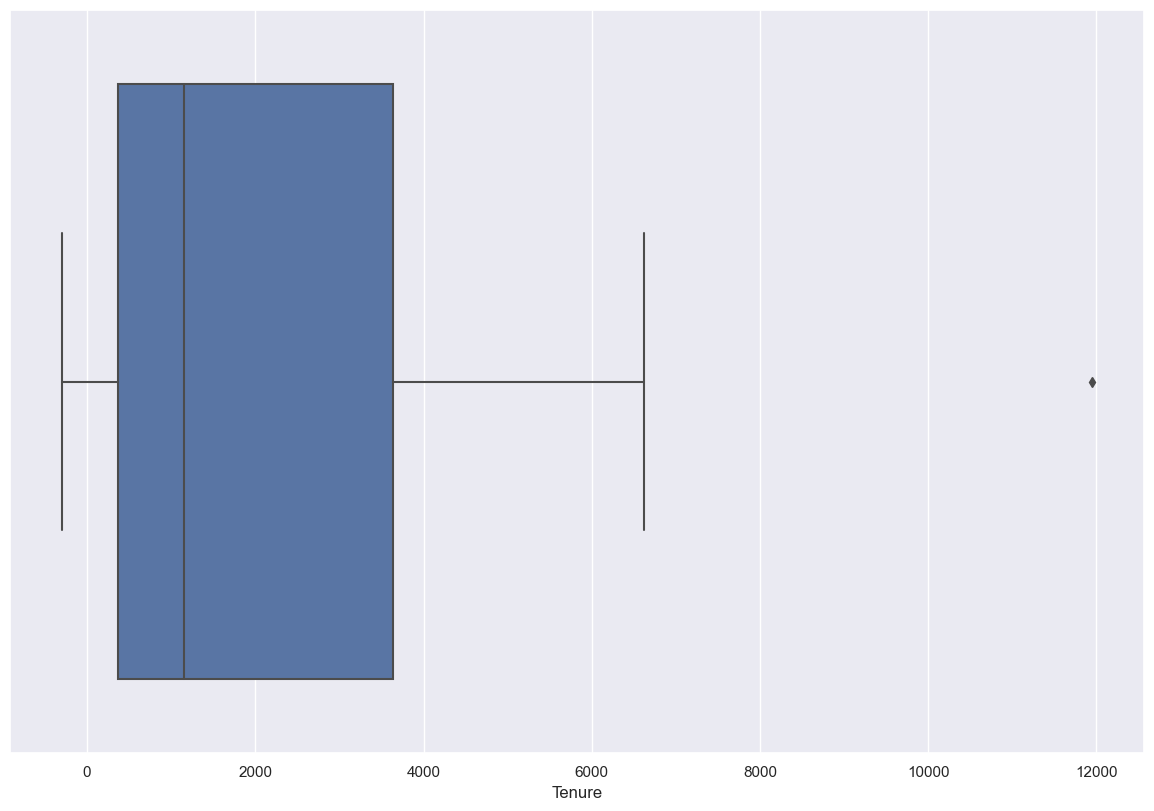

In [116]:
sns.boxplot(df['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : The range for experience is 4 years.
Histogram : The data is positively skewed i.e there exists larger number of respondents with low tenure. 50% data points are below 1.5 years. Average tenure is 1.5 years. The mean, median and mode lie very close to each other and skewness(0.6) is close to that of a normal(0).
Box Plot : There are few values with large tenure i.e outlier

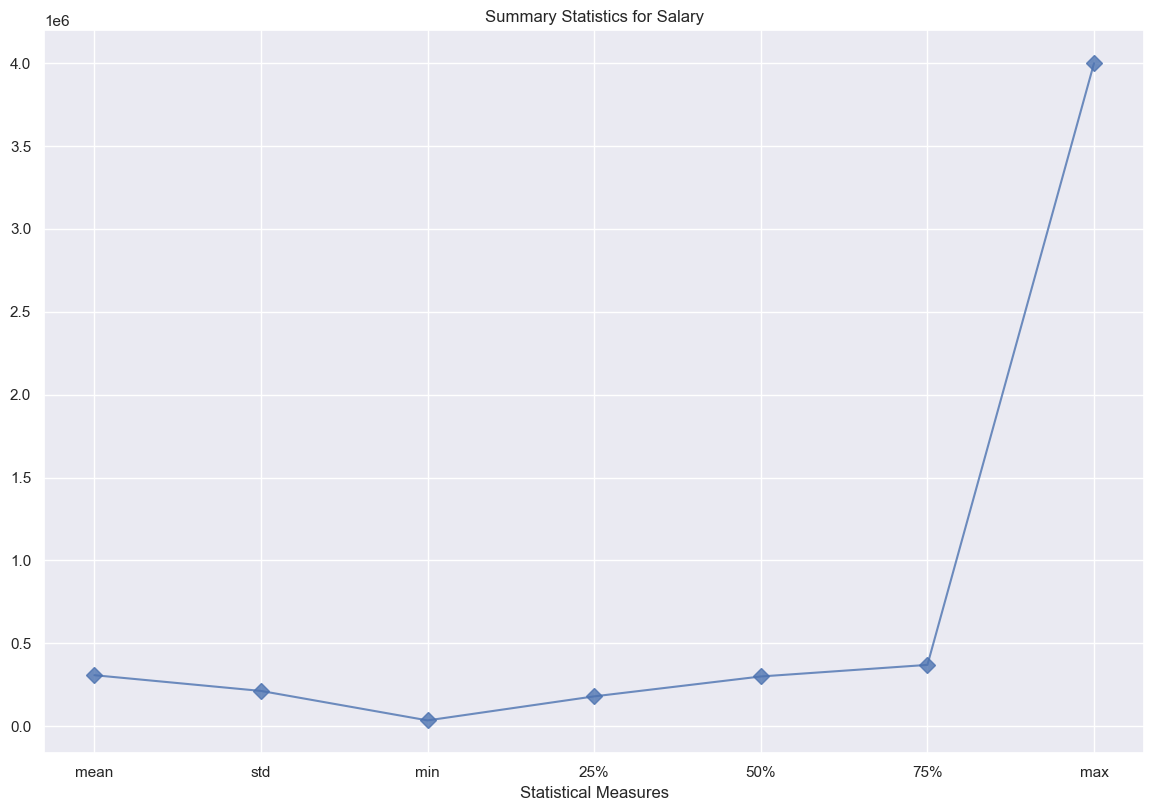

In [124]:
df['Salary'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

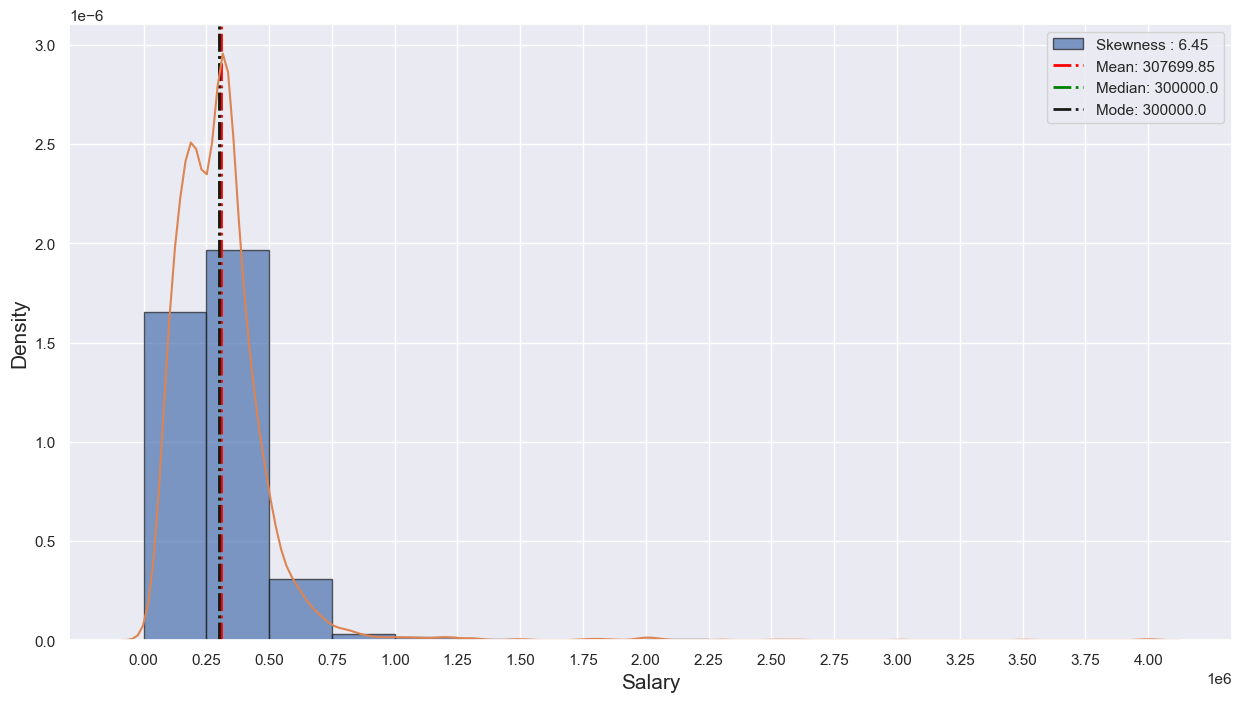

In [129]:
bins = np.arange(0, df['Salary'].max()+250000, 250000)
plt.figure(figsize = (15,8))
plt.hist(df['Salary'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Salary'].mean(), label = f"Mean: {round(df['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Salary'].median(), label = f"Median: {round(df['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Salary'].mode()[0], label = f"Mode: {round(df['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Salary'])
plt.legend()
plt.show()

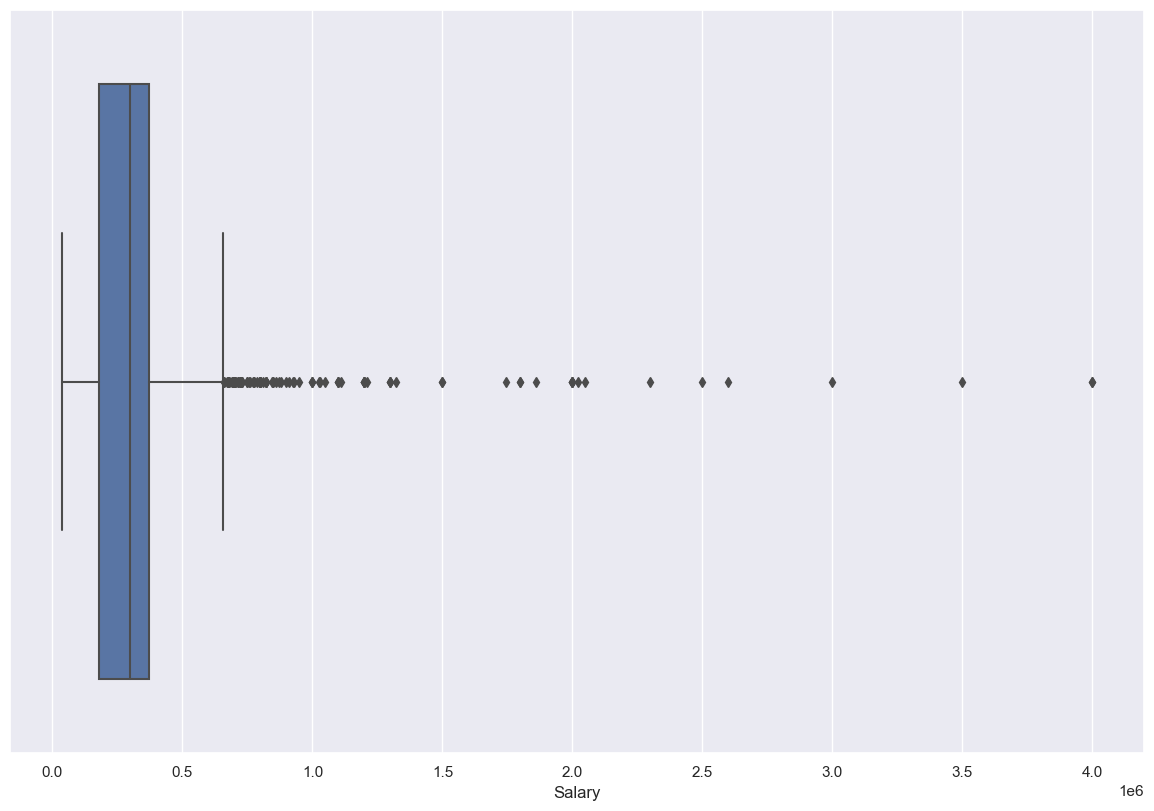

In [130]:
sns.boxplot(df['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : There is high variation in salary..
Histogram : The data is positively and highly skewed with skewness 6(approx) which is large as compared to that of normal(0). Mean, median and mode all are approximately equal.
Box Plot : There are large number of data points with high salaries.

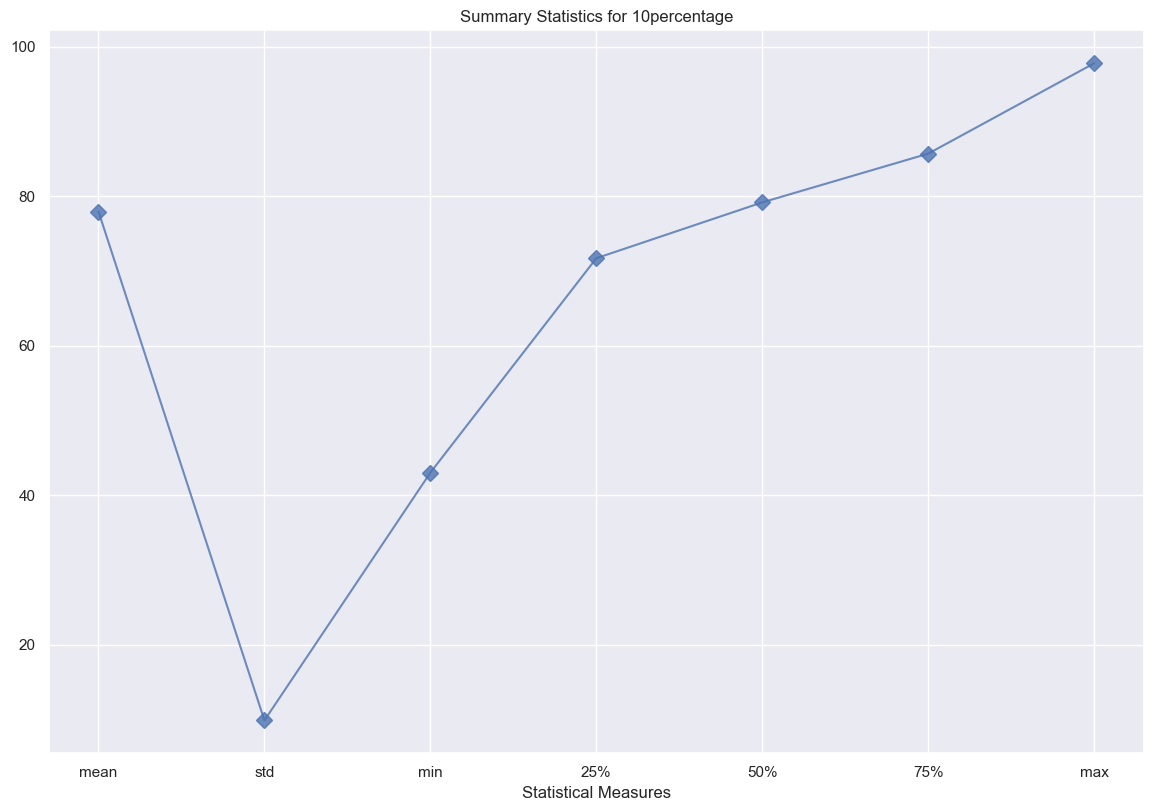

In [131]:
df['10percentage'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

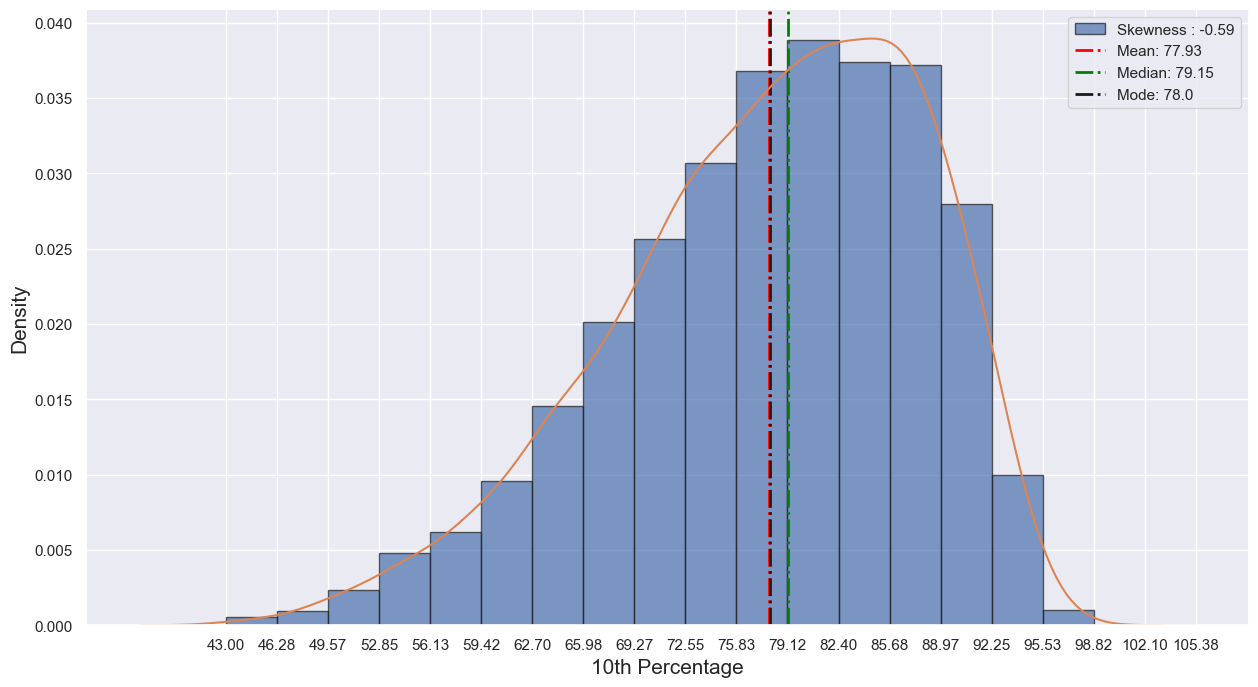

In [133]:
bins = np.arange(df['10percentage'].min(), df['10percentage'].max()+df['10percentage'].std(), 
                 df['10percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(df['10percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['10percentage'].mean(), label = f"Mean: {round(df['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['10percentage'].median(), label = f"Median: {round(df['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['10percentage'].mode()[0], label = f"Mode: {round(df['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['10percentage'])
plt.legend()
plt.show()

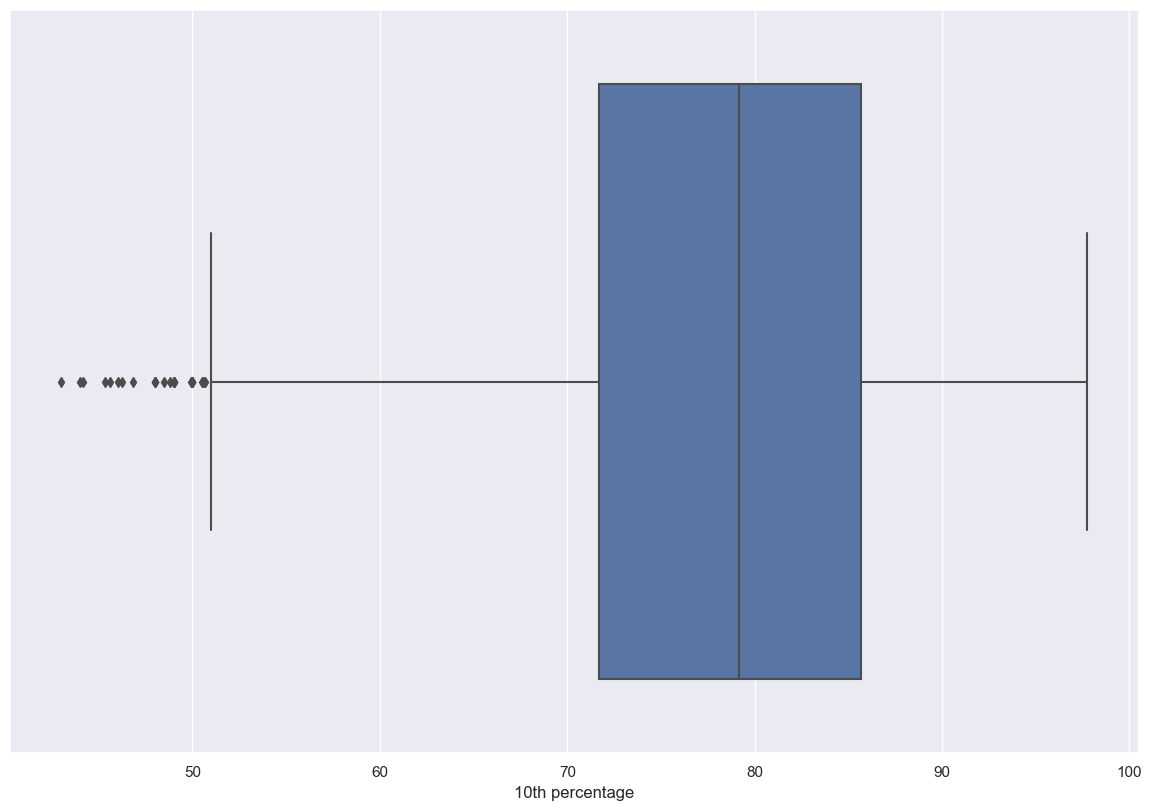

In [134]:
sns.boxplot(df['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

### Conclusions:
 

Summary Plot : 50% of students scored less than approximately 80%.
Histogram : There are very less students with low % and the majority of the students scored b/w 75% - 90%. Maximum number of students scored 78% and on average the score was 77%.
Box Plot : The box plot shows that there are few very outliers.

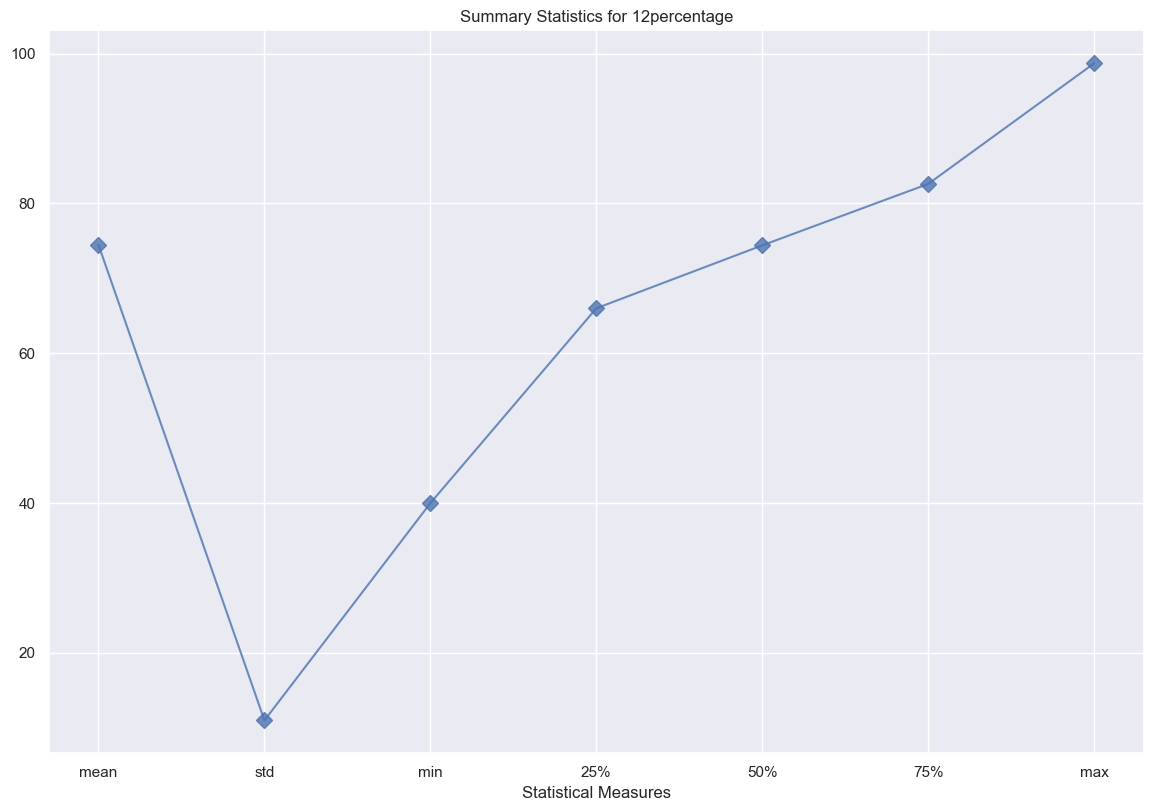

In [135]:
df['12percentage'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

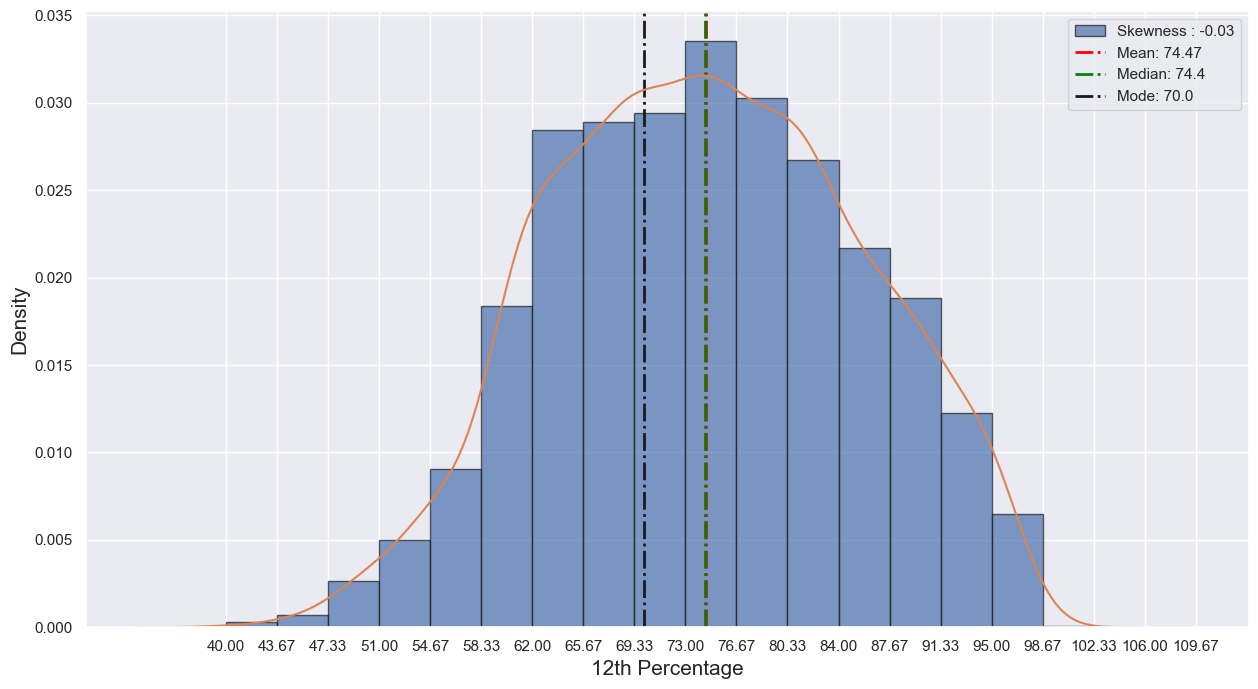

In [136]:
bins = np.arange(df['12percentage'].min(), df['12percentage'].max()+df['12percentage'].std(), 
                 df['12percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(df['12percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['12percentage'].skew(),2)}",
        alpha = 0.7, 
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['12percentage'].mean(), label = f"Mean: {round(df['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['12percentage'].median(), label = f"Median: {round(df['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['12percentage'].mode()[0], label = f"Mode: {round(df['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['12percentage'])
plt.legend()
plt.show()

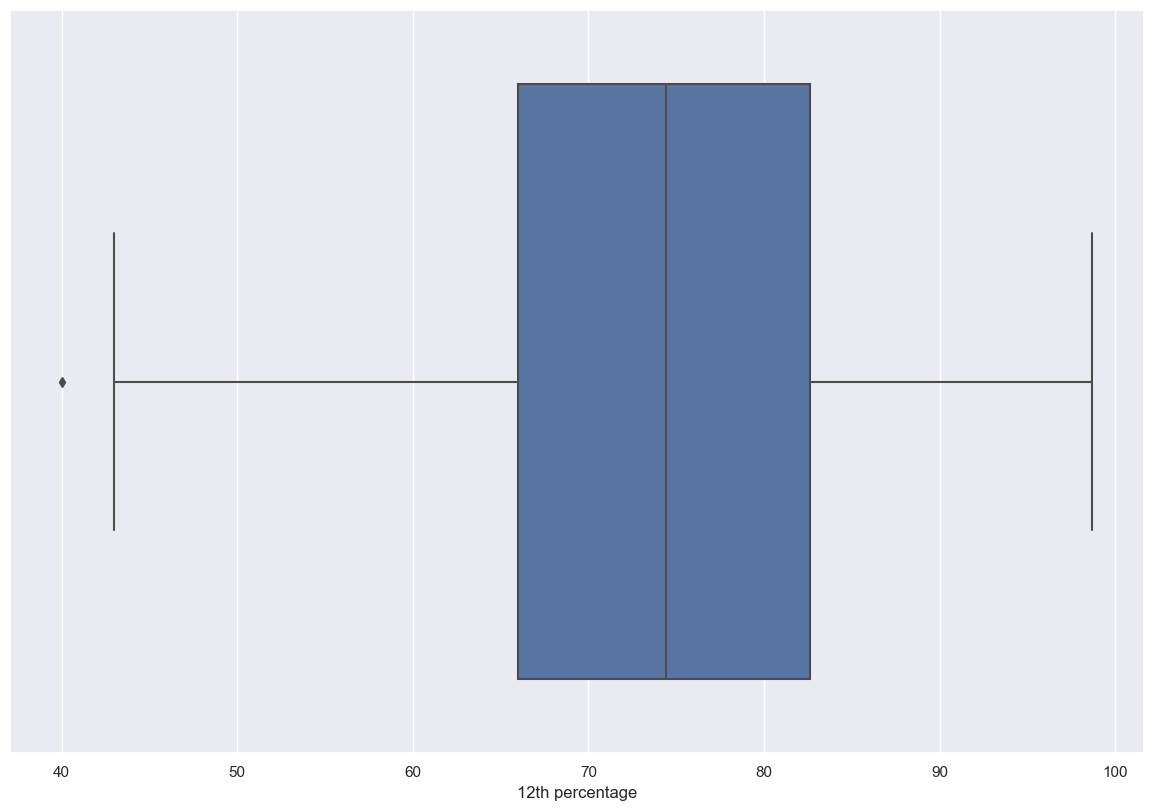

In [137]:
sns.boxplot(df['12percentage'])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : 50% of students scored less than approximately 78%.
Histogram : There are very less students with low % and the majority of the students scored b/w 69% - 84%. Maximum number of students scored 70% and on average the score was 74%.
Box Plot : The box plot shows that there is only data point with extreamly low score.

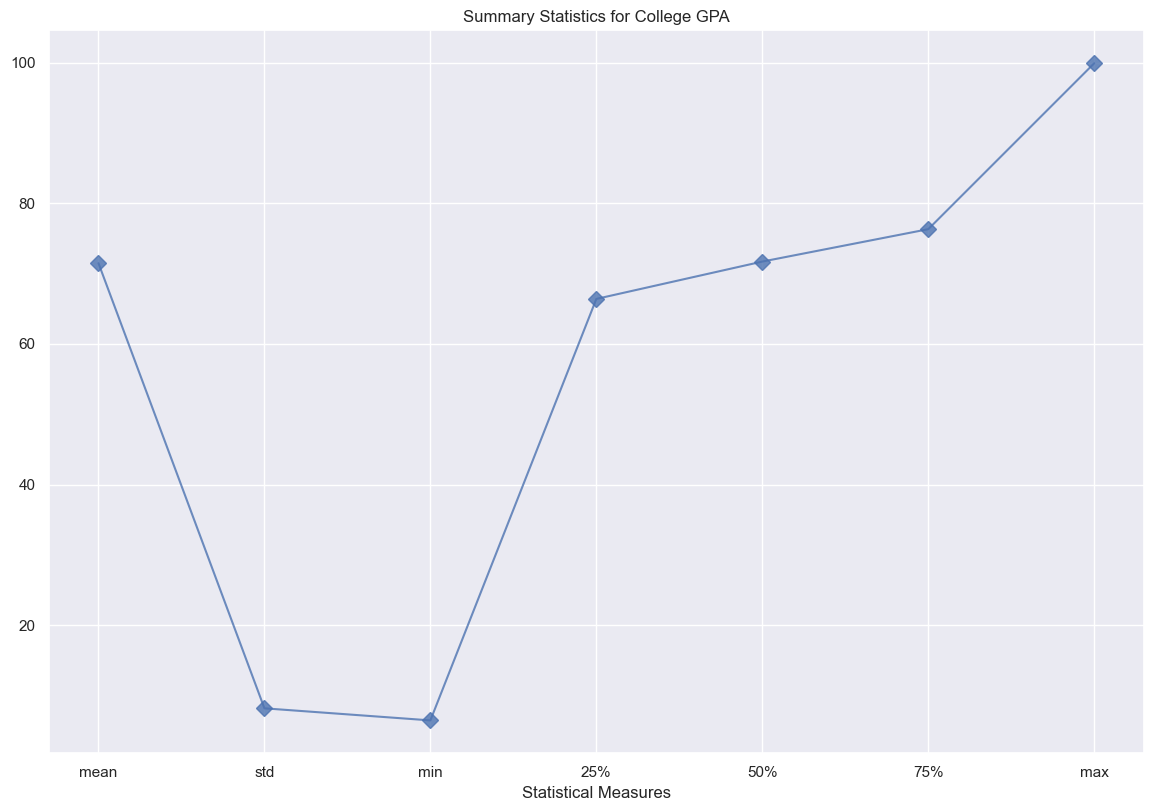

In [144]:
df['collegeGPA'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

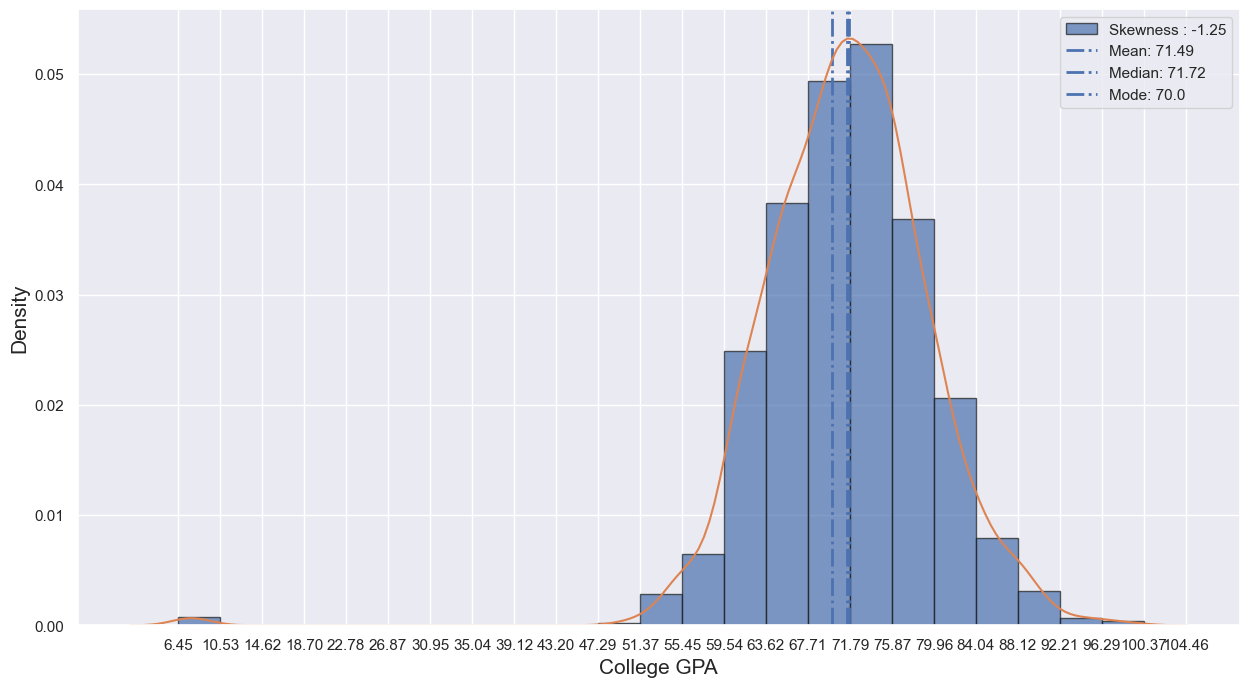

In [156]:
bins = np.arange(df['collegeGPA'].min(), df['collegeGPA'].max()+df['collegeGPA'].std(), 
                 df['collegeGPA'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['collegeGPA'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['collegeGPA'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['collegeGPA'].mean(), label = f"Mean: {round(df['collegeGPA'].mean(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['collegeGPA'].median(), label = f"Median: {round(df['collegeGPA'].median(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['collegeGPA'].mode()[0], label = f"Mode: {round(df['collegeGPA'].mode()[0],2)}"
           , linestyle = '-.',
           linewidth = 2)
sns.kdeplot(df['collegeGPA'])
plt.legend()
plt.show()

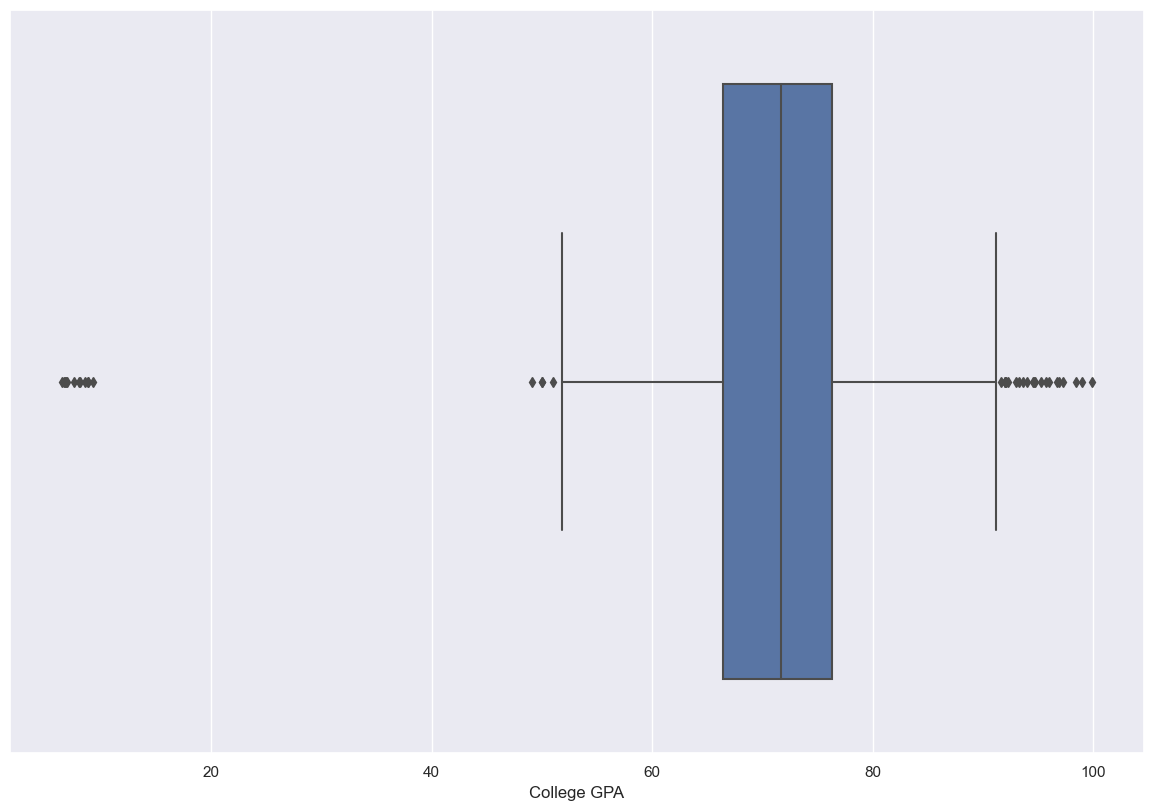

In [157]:
sns.boxplot(df['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : 75% of students GPA was less than approximately 80%.
Histogram : Majority of the students GPA were in b/w 63% - 78%. Maximum number of students scored 70% and on average GPA score was 74%.
Box Plot : The box plot shows that there exist low extreme values as well as high extreme values.

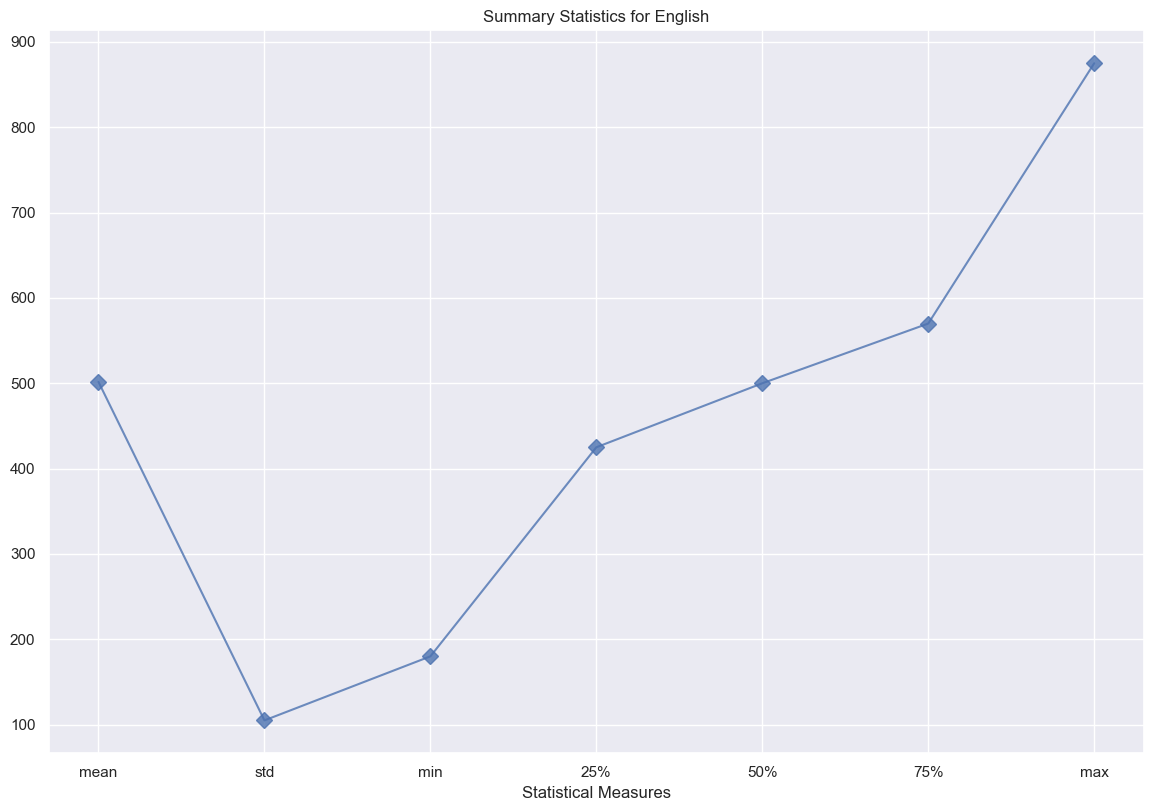

In [159]:
df['English'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

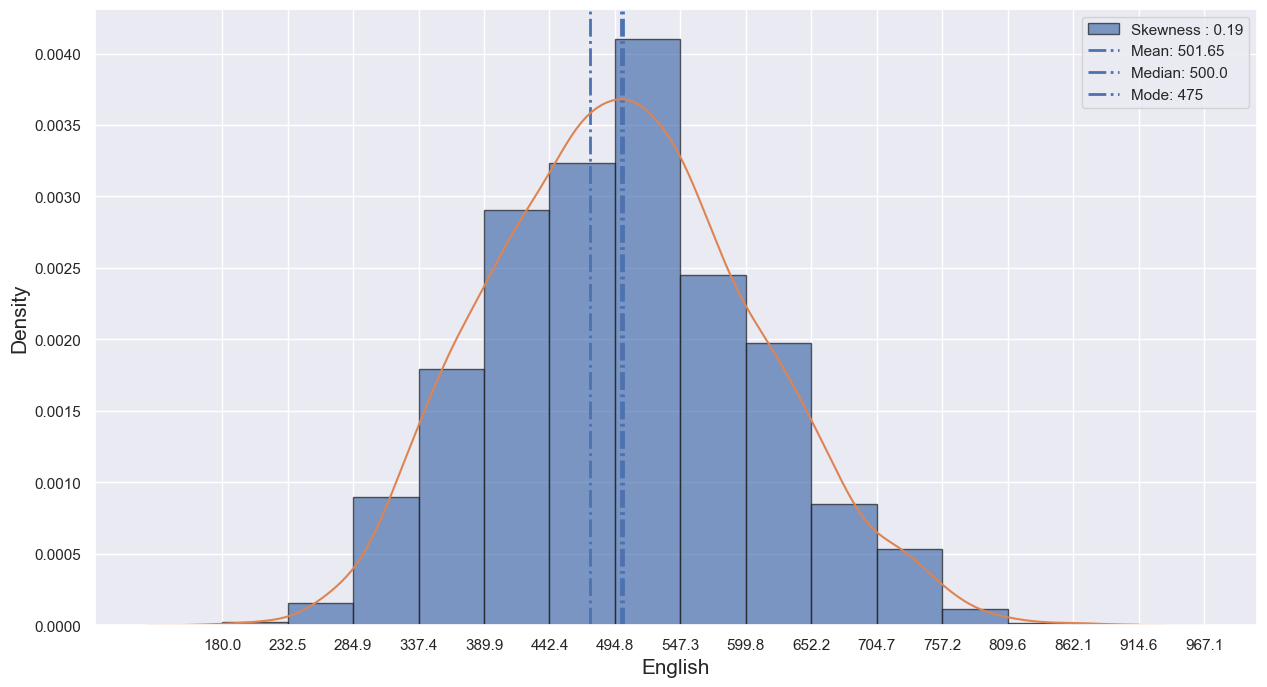

In [161]:
bins = np.arange(df['English'].min(), df['English'].max()+df['English'].std(), 
                 df['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['English'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['English'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['English'].mean(), label = f"Mean: {round(df['English'].mean(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['English'].median(), label = f"Median: {round(df['English'].median(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['English'].mode()[0], label = f"Mode: {round(df['English'].mode()[0],2)}"
           , linestyle = '-.',
           linewidth = 2)
sns.kdeplot(df['English'])
plt.legend()

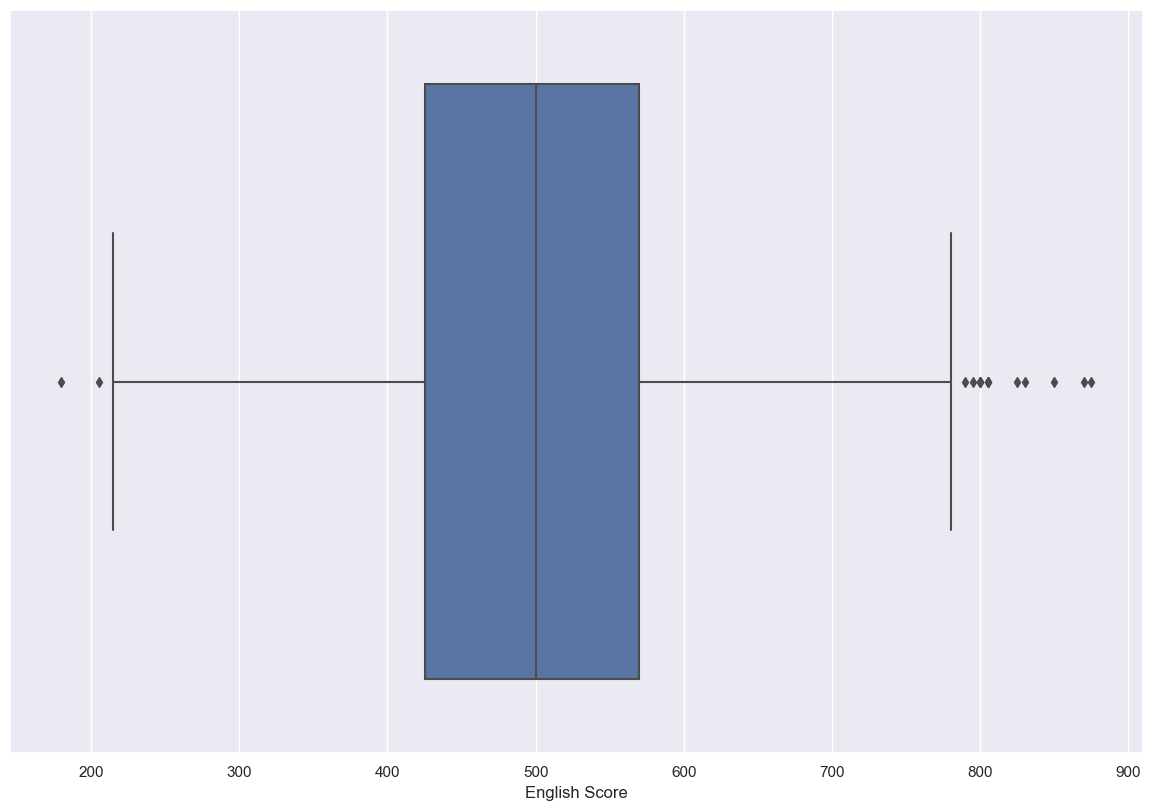

In [162]:
sns.boxplot(df['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : 50% of student's english score was less than 500.
Histogram : Majority of the score were in b/w 389 - 545. Maximum number of students scored 475 and on average score was 502.
Box Plot : The box plot shows that there exist low extreme values as well as high extreme values.

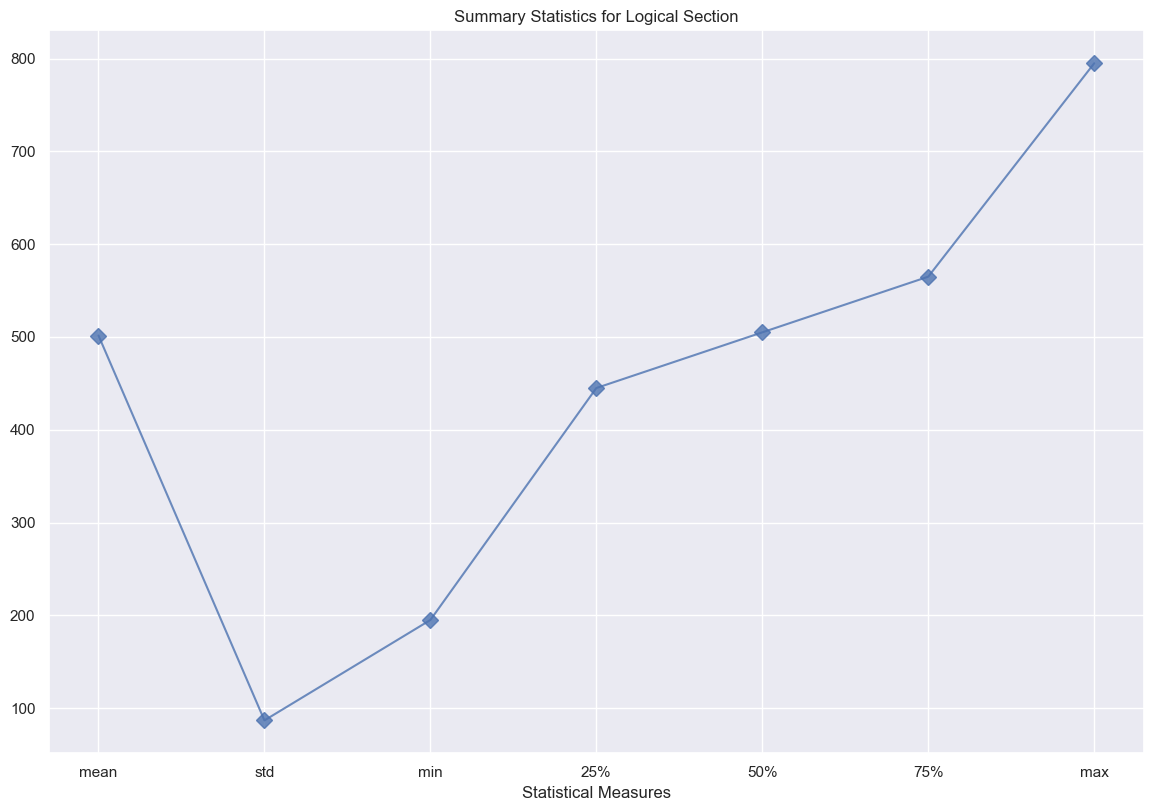

In [164]:
df['Logical'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

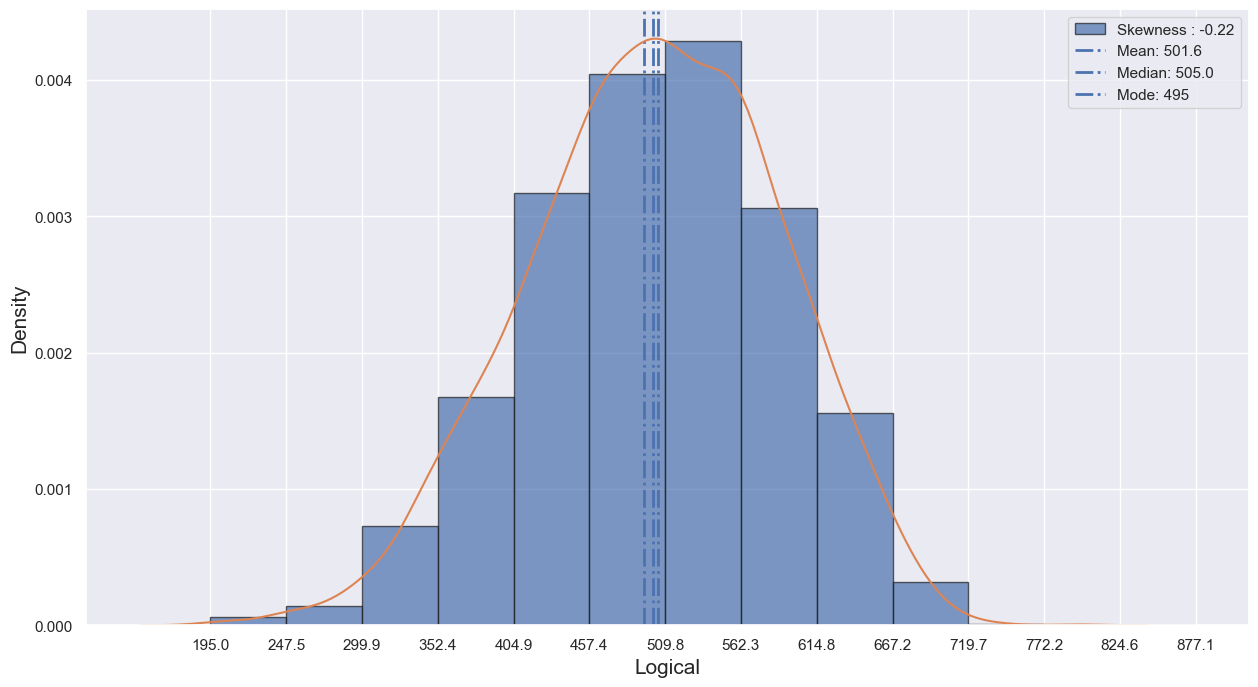

In [165]:
bins = np.arange(df['Logical'].min(), df['Logical'].max()+df['Logical'].std(), 
                 df['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Logical'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Logical'].mean(), label = f"Mean: {round(df['Logical'].mean(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['Logical'].median(), label = f"Median: {round(df['Logical'].median(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['Logical'].mode()[0], label = f"Mode: {round(df['Logical'].mode()[0],2)}"
           , linestyle = '-.',
           linewidth = 2)
sns.kdeplot(df['Logical'])
plt.legend()

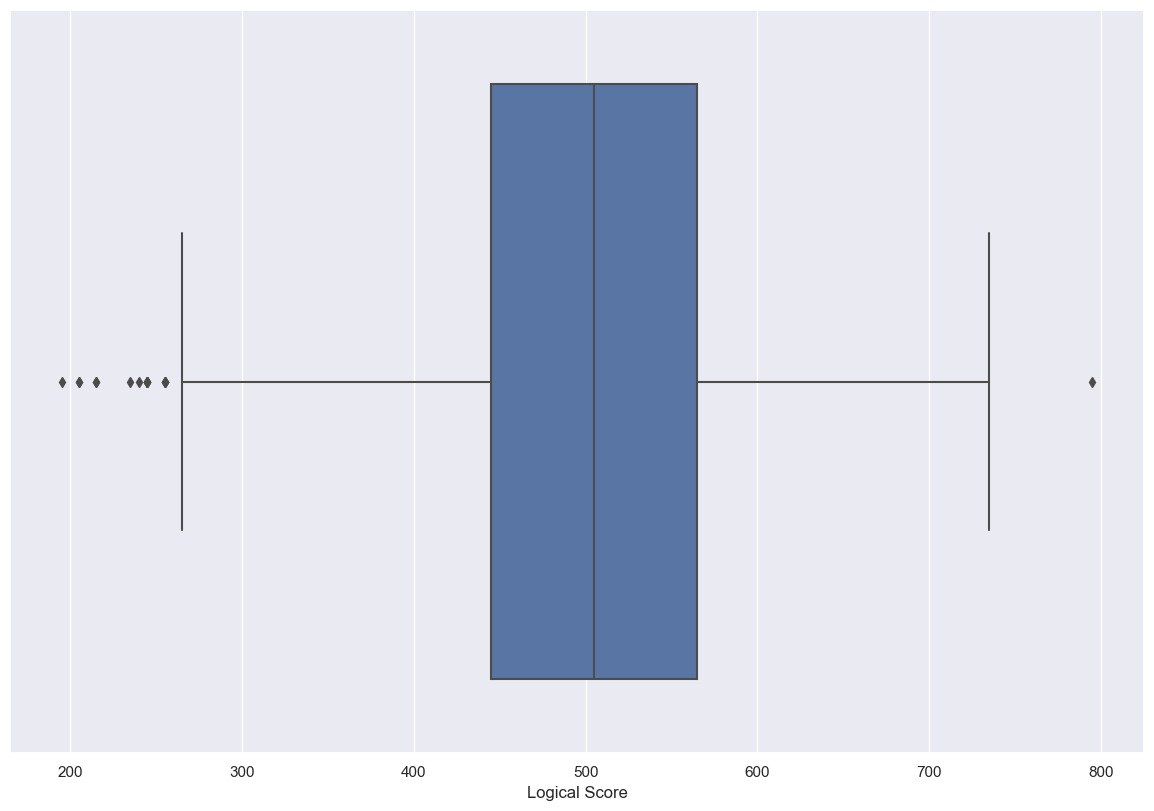

In [166]:
sns.boxplot(df['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : 50% of student's logical score was less than 500.
Histogram : Majority of the score were in b/w 454 - 584. Maximum number of students scored 495 and on average score was 502.
Box Plot : The box plot shows that there exist low extreme values but only one high extreme values.

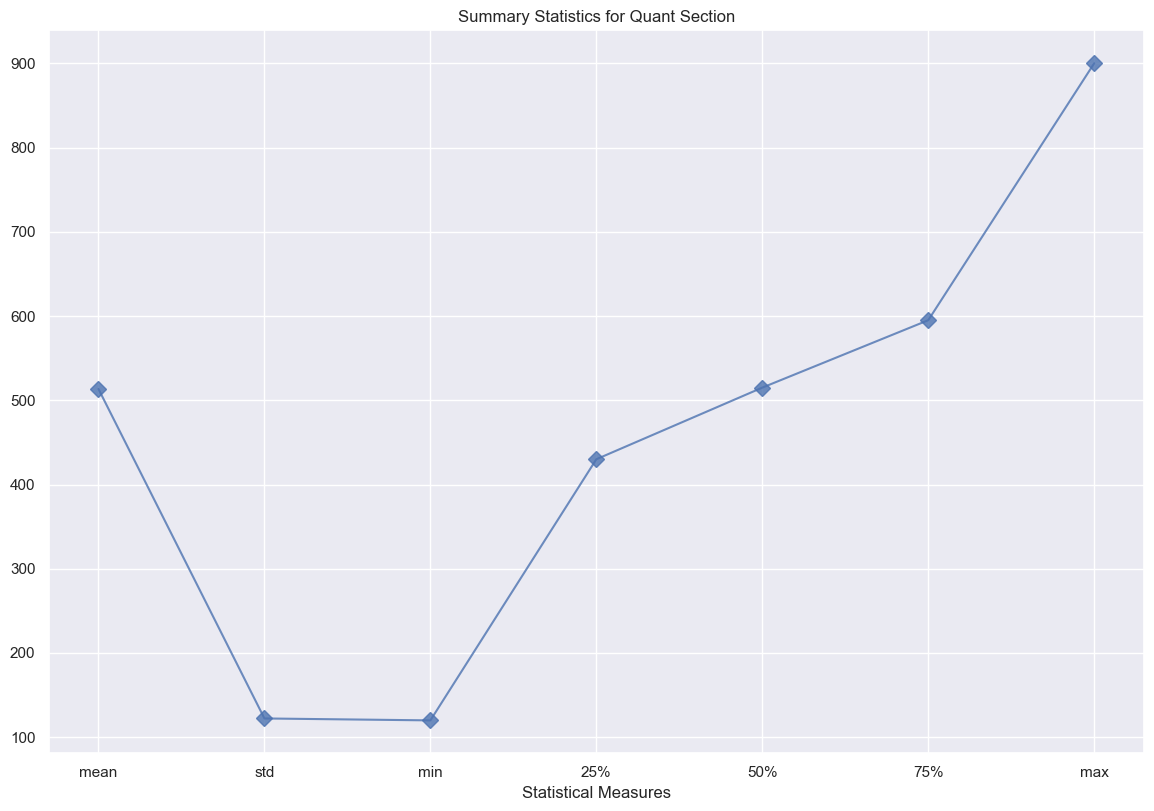

In [168]:
df['Quant'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

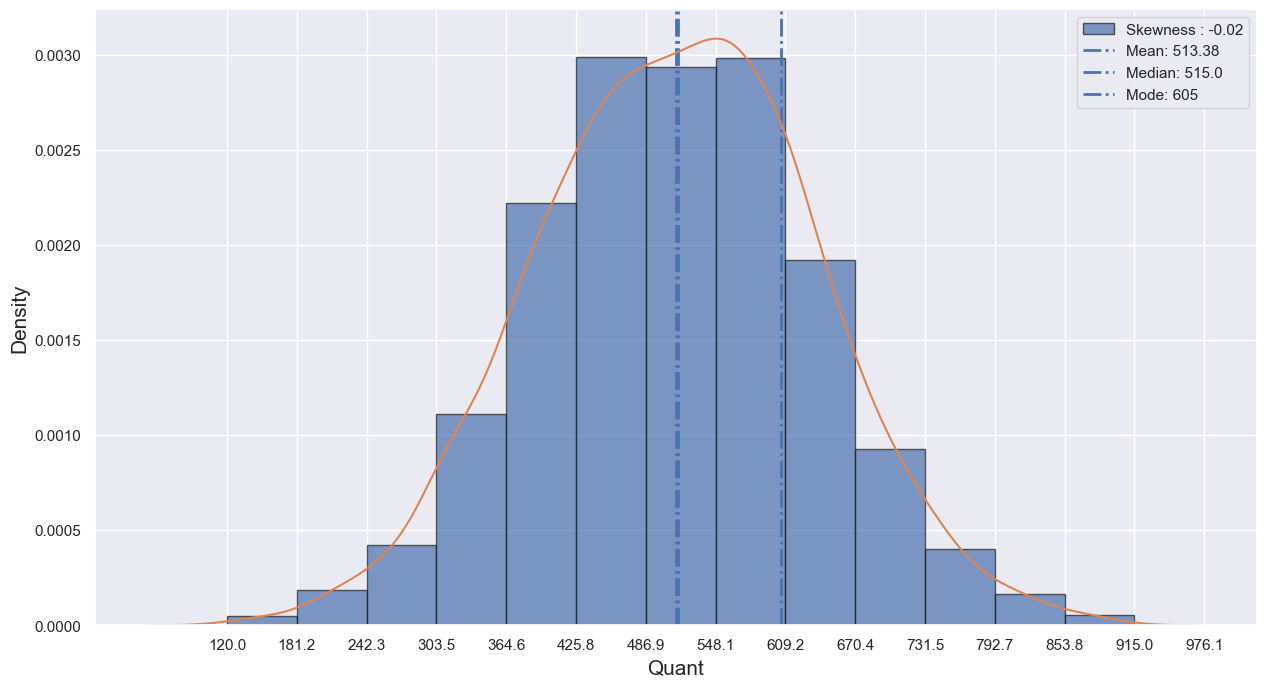

In [169]:
bins = np.arange(df['Quant'].min(), df['Quant'].max()+df['Quant'].std(), 
                 df['Quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Quant'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Quant'].mean(), label = f"Mean: {round(df['Quant'].mean(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['Quant'].median(), label = f"Median: {round(df['Quant'].median(),2)}"
           , linestyle = '-.',
           linewidth = 2)
plt.axvline(df['Quant'].mode()[0], label = f"Mode: {round(df['Quant'].mode()[0],2)}"
           , linestyle = '-.',
           linewidth = 2)
sns.kdeplot(df['Quant'])
plt.legend()

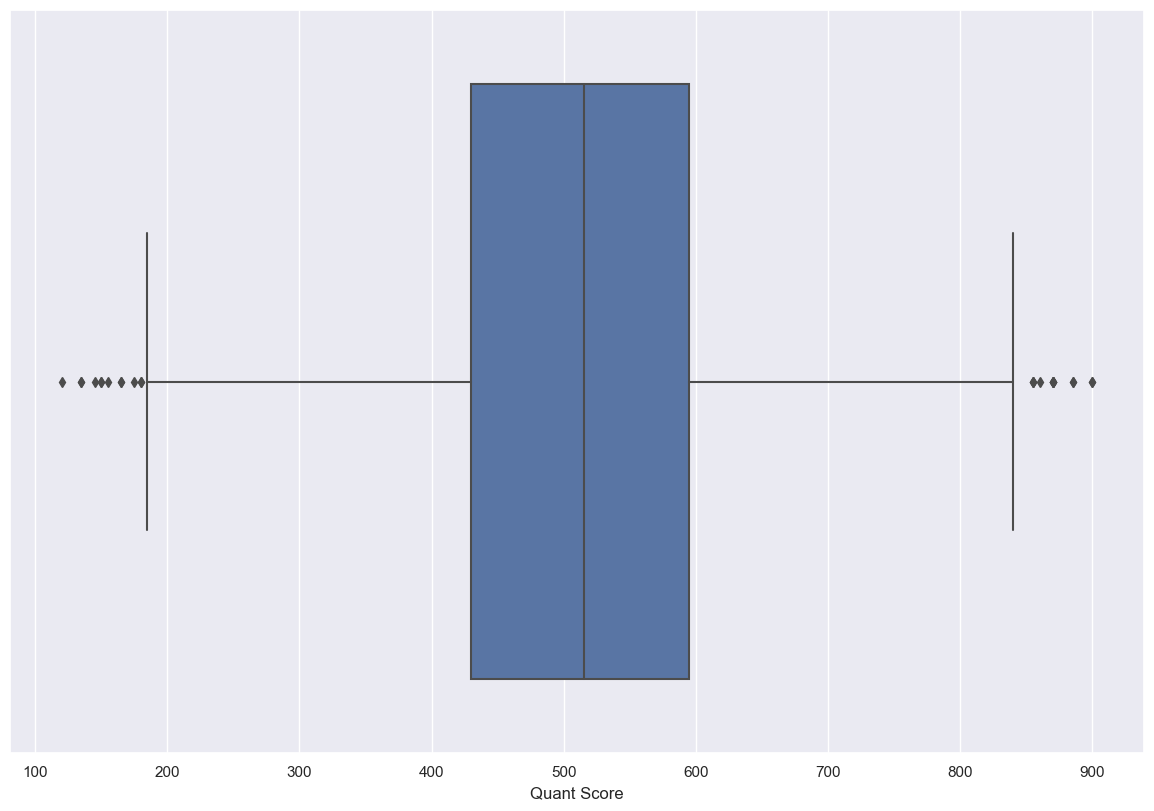

In [171]:
sns.boxplot(df['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

### Conclusions:


Summary Plot : 75% of student's logical score was less than 600.
Histogram : Majority of the score were in b/w 425 - 608. Maximum number of students scored 605 and on average score was 513.
Box Plot : The box plot shows that there exist low extreme values as well as high extreme values.

In [55]:
# a.Countplot

# countplot to plot count of eah category of categorical features

In [56]:
import warnings
warnings.filterwarnings("ignore")

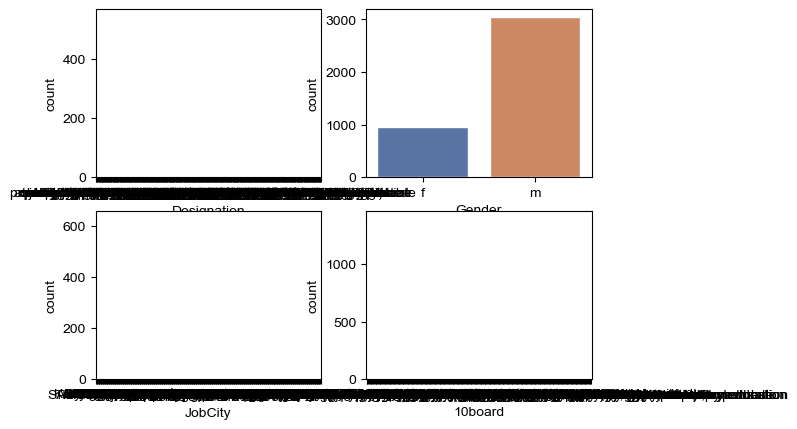

In [57]:
fig, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize' :(11.7,8.27)})
p1 = sns.countplot(df["Designation"],ax = axes[0,0])
p2 = sns.countplot(df["Gender"],ax = axes[0,1])
p3 = sns.countplot(df["JobCity"],ax = axes[1,0])
p4 = sns.countplot(df["10board"],ax = axes[1,1])

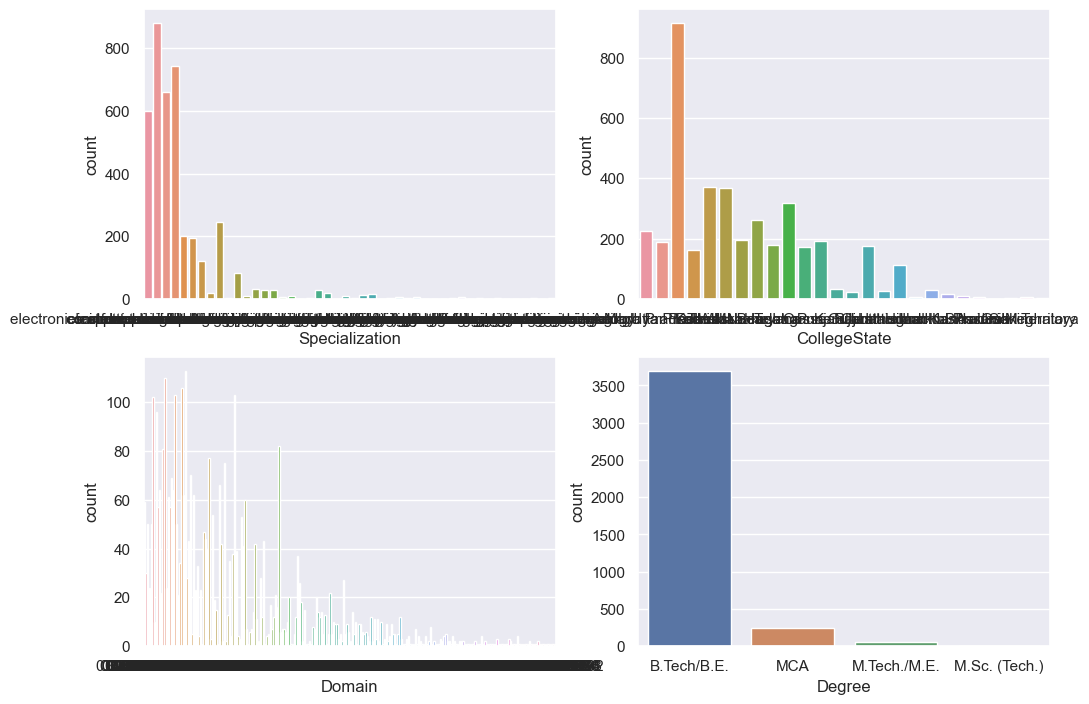

In [58]:
fig, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize' :(11.7,8.27)})
p1 = sns.countplot(df["Specialization"],ax = axes[0,0])
p2 = sns.countplot(df["CollegeState"],ax = axes[0,1])
p3 = sns.countplot(df["Domain"],ax = axes[1,0])
p4 = sns.countplot(df["Degree"],ax = axes[1,1])

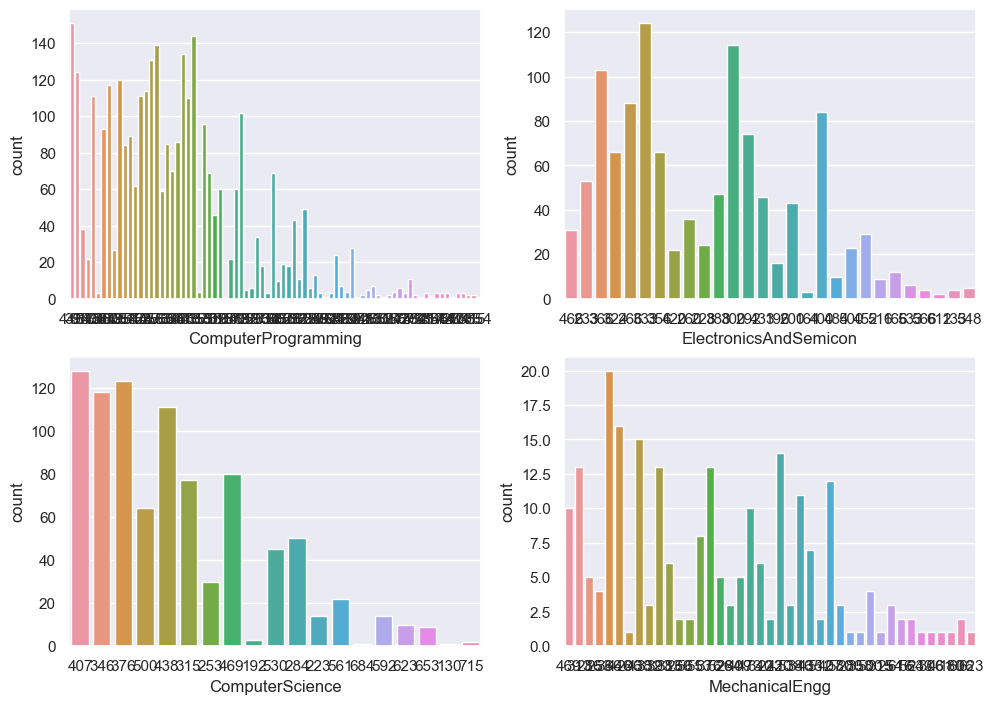

In [59]:
fig, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize' :(11.7,8.27)})
p1 = sns.countplot(df["ComputerProgramming"],ax = axes[0,0])
p2 = sns.countplot(df["ElectronicsAndSemicon"],ax = axes[0,1])
p3 = sns.countplot(df["ComputerScience"],ax = axes[1,0])
p4 = sns.countplot(df["MechanicalEngg"],ax = axes[1,1])

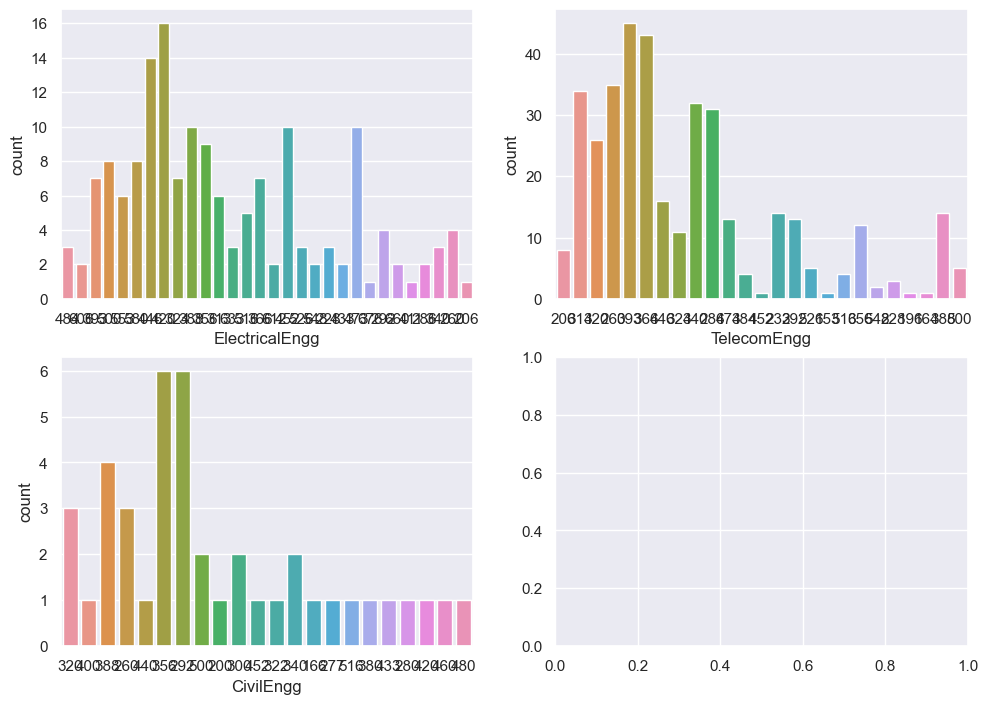

In [60]:
fig, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize' :(11.7,8.27)})
p1 = sns.countplot(df["ElectricalEngg"],ax = axes[0,0])
p2 = sns.countplot(df["TelecomEngg"],ax = axes[0,1])
p3 = sns.countplot(df["CivilEngg"],ax = axes[1,0])


In [61]:
# b. pie chart for cateorical data

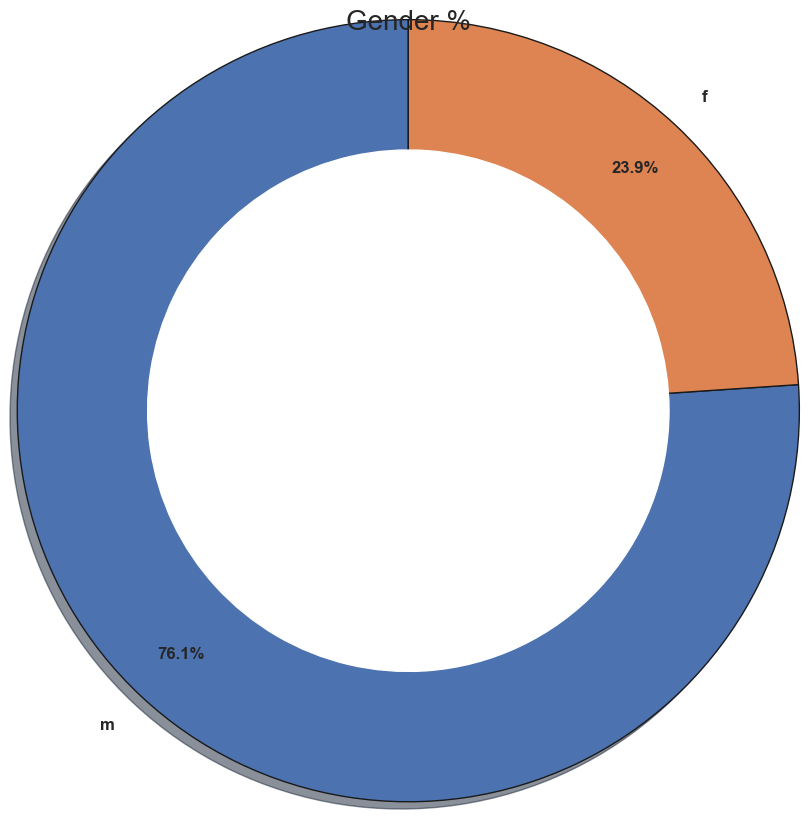

In [76]:
plt.pie(df['Gender'].value_counts().tolist(), labels = df['Gender'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['Gender'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('Gender %',pad = 40, size = 20)
plt.tight_layout()
plt.show()

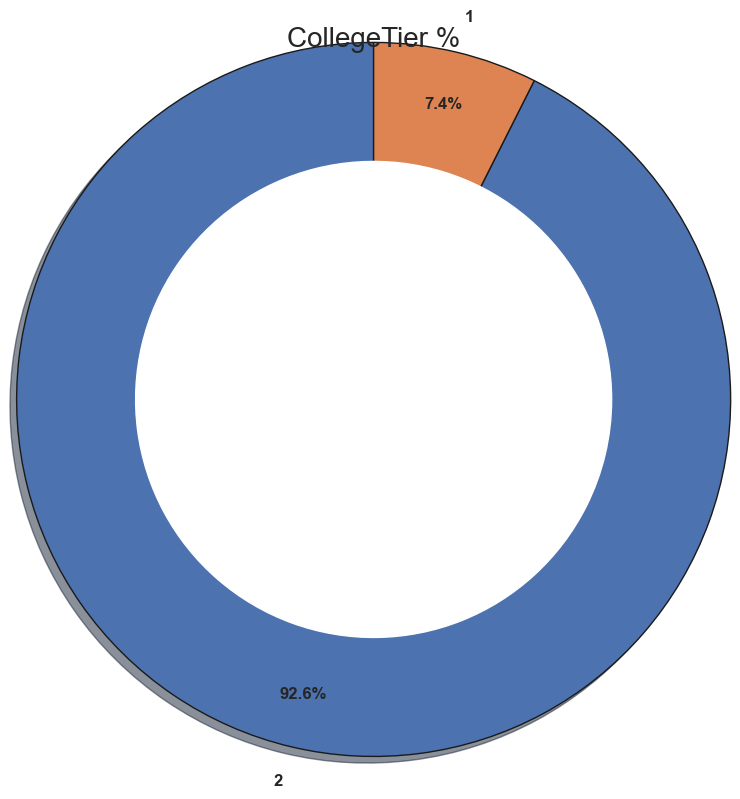

In [78]:
plt.pie(df['CollegeTier'].value_counts().tolist(), labels = df['CollegeTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       #explode = [0.1,0],
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('CollegeTier %' ,pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

In [81]:
# CONCLUSION : Almost all the college belongs to Tier 1 only with a % of 92.5

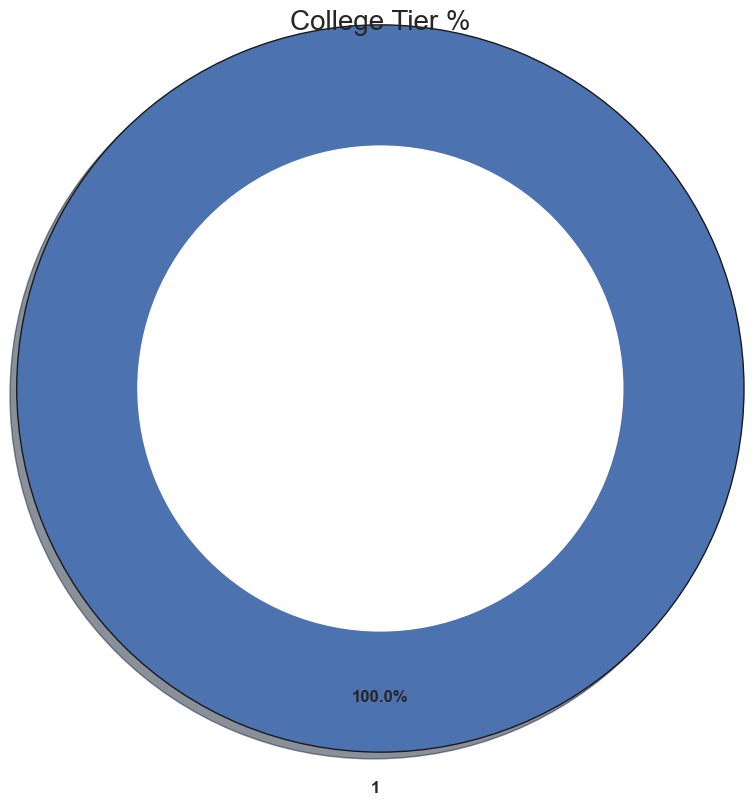

In [95]:
plt.pie(df['CollegeCityTier'].value_counts().tolist(), labels = df['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':12,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 20)
plt.margins(0.02)
plt.tight_layout()
plt.show()

In [ ]:
# CONCLUSION : Majority of the colleges are form Tier 0 city.

### Bivariate Analysis

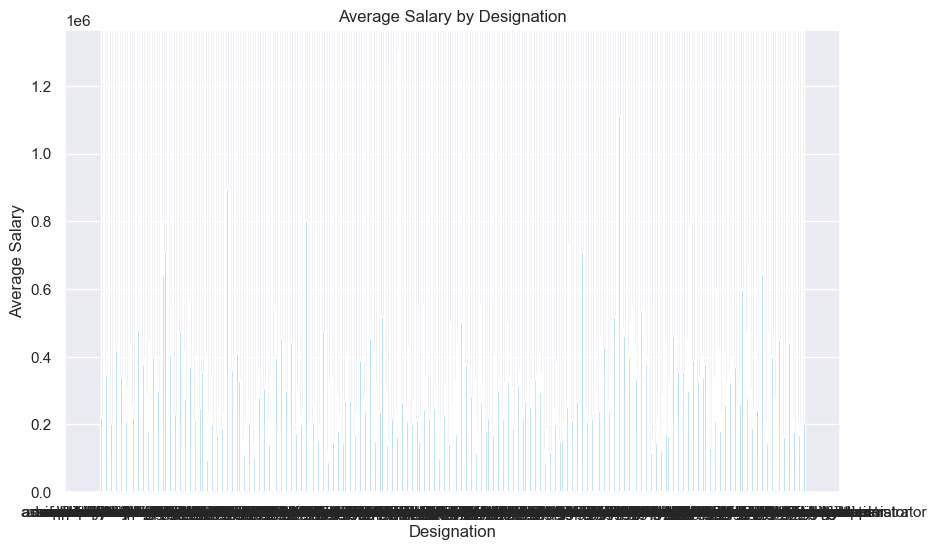

In [235]:
mean_salary_by_designation = df.groupby('Designation')['Salary'].mean().reset_index()


plt.figure(figsize=(10, 6))


plt.bar(mean_salary_by_designation['Designation'], mean_salary_by_designation['Salary'], color='skyblue')


plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.title('Average Salary by Designation')


plt.show()

### CONCLUSION : 

Bar plot shows the maximum salary for each designation.
Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. 
There are only two designations namely, software developer and technical 
Support engineer who has salary lower than average salary.

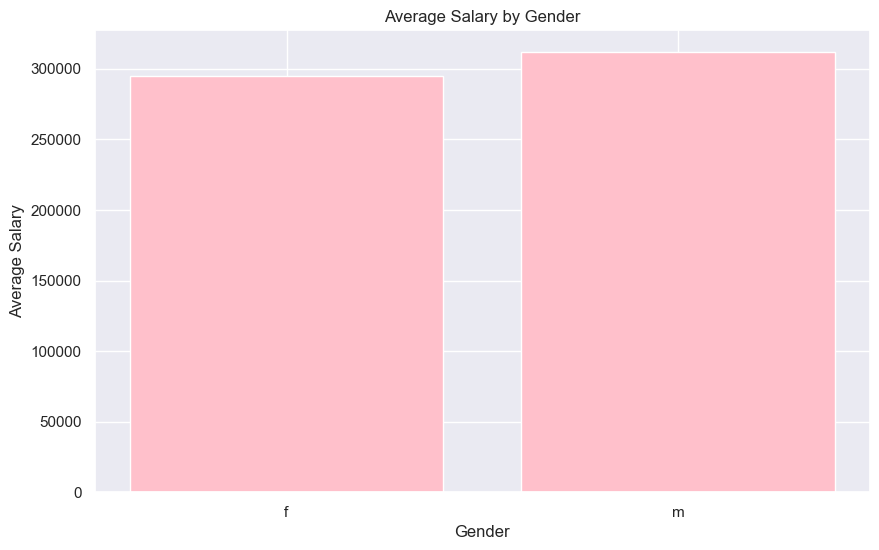

In [209]:
mean_salary_by_designation = df.groupby('Gender')['Salary'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(mean_salary_by_designation['Gender'], mean_salary_by_designation['Salary'], color='pink')


plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender')


plt.show()

### CONCLUSION: 

The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary.

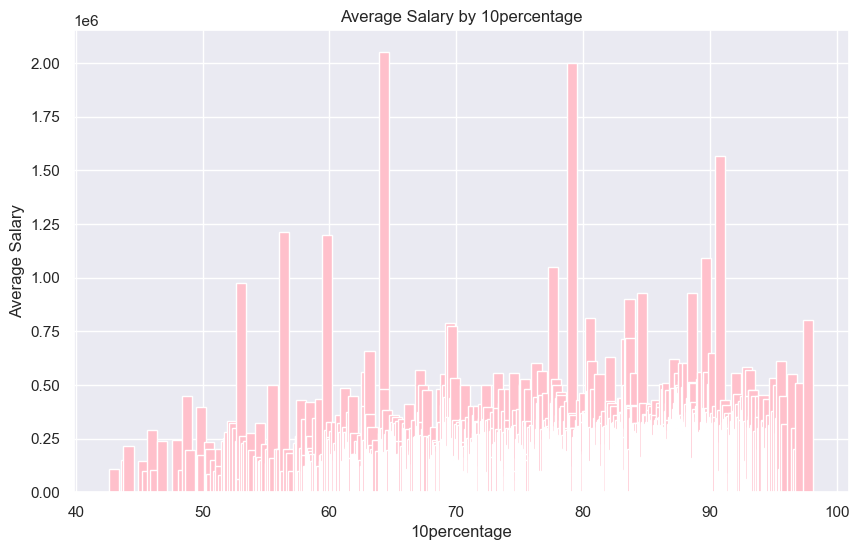

In [236]:
mean_salary_by_designation = df.groupby('10percentage')['Salary'].mean().reset_index()


plt.figure(figsize=(10, 6))

plt.bar(mean_salary_by_designation['10percentage'], mean_salary_by_designation['Salary'], color='pink')


plt.xlabel('10percentage')
plt.ylabel('Average Salary')
plt.title('Average Salary by 10percentage')


plt.show()

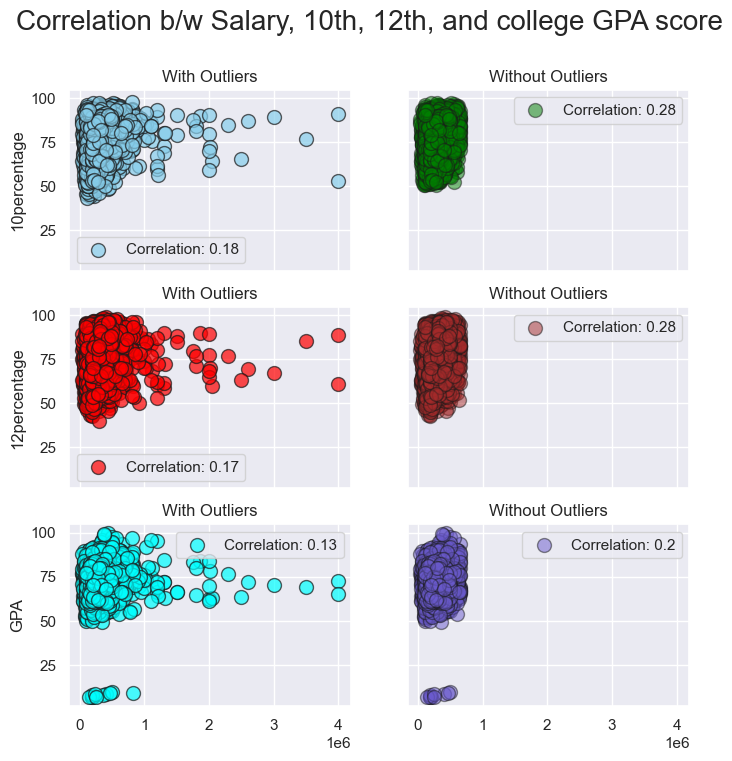

In [218]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharex = True, sharey = True)
The average salary for both male and 


ax[0,0].scatter(df['Salary'],df['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('10percentage')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['Salary'],df_copy['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].legend()


#scatter plot for Salary and 12th score.
ax[1,0].scatter(df['Salary'],df['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('12percentage')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['Salary'],df_copy['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()


#scatter plot for Salary and college GPA score.
ax[2,0].scatter(df['Salary'],df['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 100,
               label = f"Correlation: {round(df[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('GPA')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['Salary'],df_copy['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 100,
               label = f"Correlation: {round(df_copy[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()



fig.suptitle('Correlation b/w Salary, 10th, 12th, and college GPA score', size = 20)
plt.show()


### CONCLUSION : 

There does not exist any correaltion b/w Salary, 10th, 12th and GPA scores.

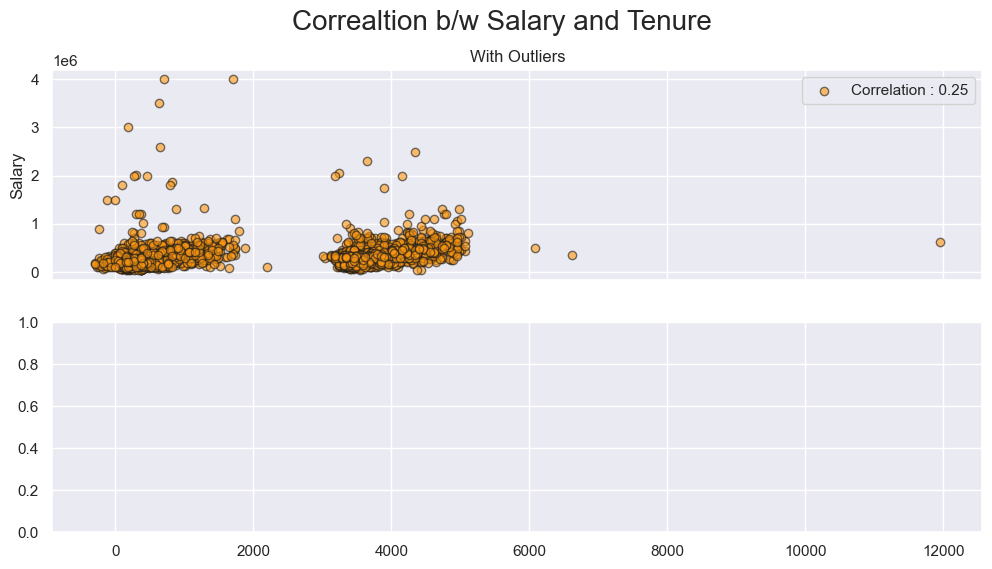

In [224]:
#correaltion b/w Salary, age and Tenure.
fig, ax = plt.subplots(2, 1, figsize = (12,6), sharex  = True)
ax[0].scatter(df['Tenure'], df['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers')



fig.suptitle('Correaltion b/w Salary and Tenure', size = 20)

plt.show()


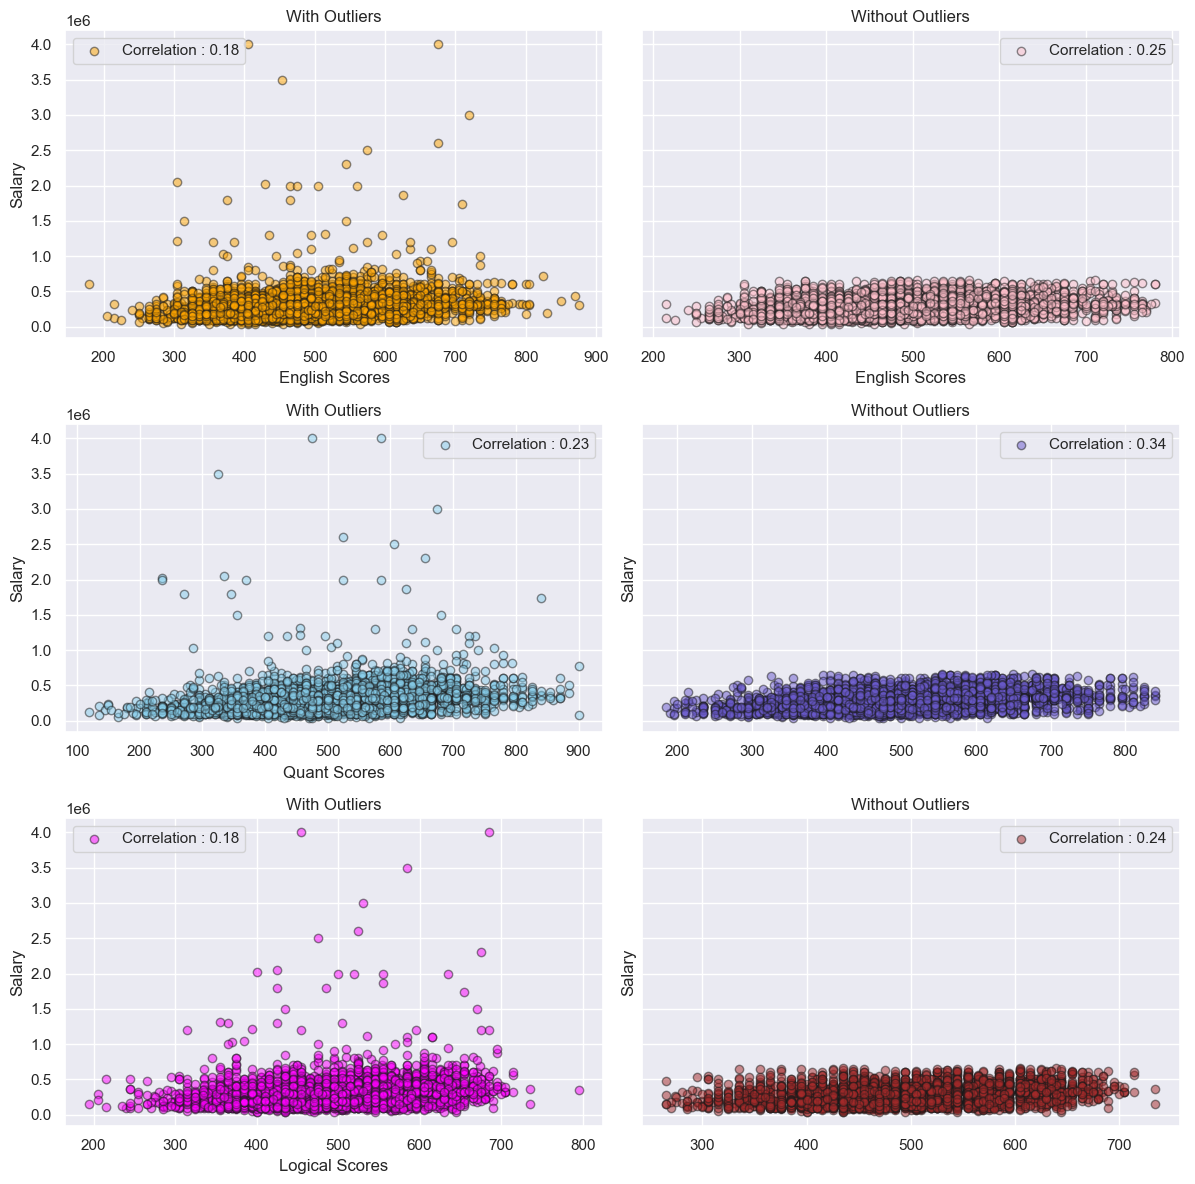

In [228]:
fig, ax = plt.subplots(3, 2, figsize = (12,12), sharey = True)
ax[0,0].scatter(df['English'],df['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(df[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df_copy['English'],df_copy['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(df['Quant'],df['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df_copy['Quant'],df_copy['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(df['Logical'],df['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df_copy['Logical'],df_copy['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df_copy[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()


### CONCLUSION : .

The scatters plots gives adequate evidence that salary is not effected by any of the above scores

<AxesSubplot:ylabel='Specialization'>

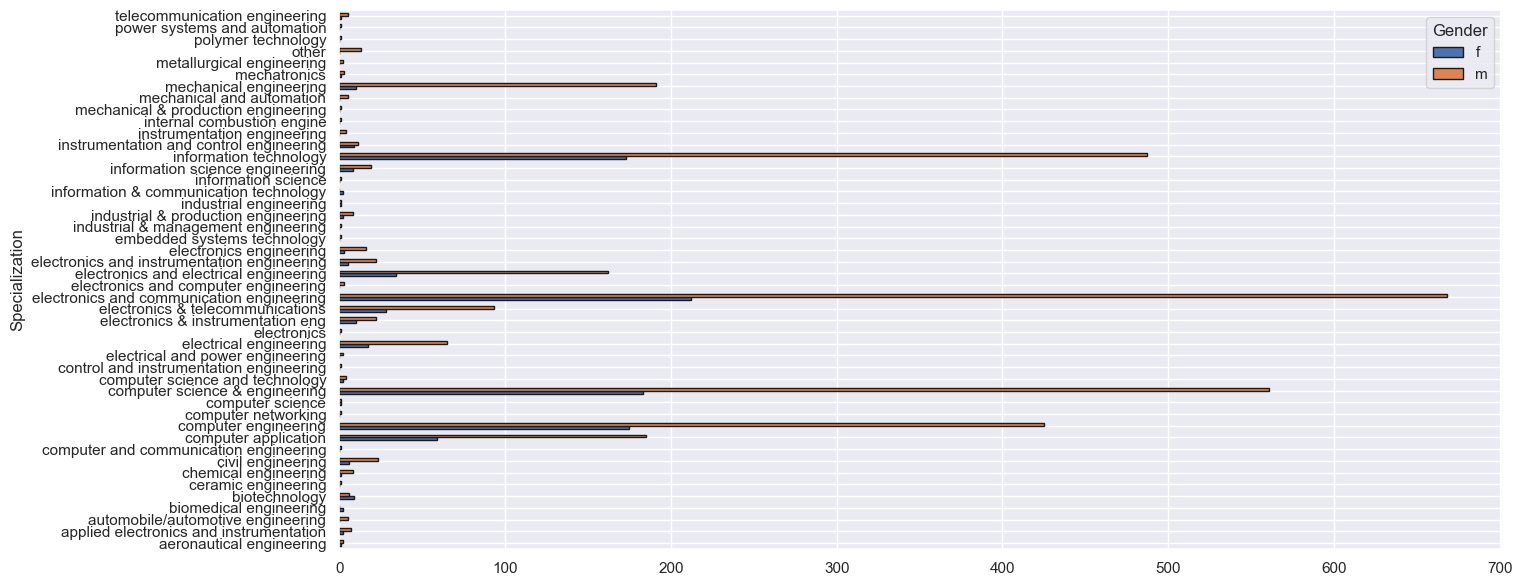

In [230]:
pd.crosstab(df['Gender'], df['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (15,7))

### CONCLUSION 

There are almost males 2 times as of females in every specialization.
    Also, there are very less number of females who opted for mechanical and electronics.

In [231]:
df_copy.head()


ID    Salary        DOJ        DOL              Designation  \
0   203097  420000.0 2012-06-01 2024-02-20  senior quality engineer   
1   579905  500000.0 2013-09-01 2024-02-20        assistant manager   
2   810601  325000.0 2014-06-01 2024-02-20         systems engineer   
4   343523  200000.0 2014-03-01 2015-03-01                      get   
5  1027655  300000.0 2014-06-01 2024-02-20          system engineer   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19         84.30  board ofsecondary education,ap   
1     Indore      m 1989-10-04         85.40                            cbse   
2    Chennai      f 1992-08-03         85.00                            cbse   
4    Manesar      m 1991-02-27         78.00                            cbse   
5  Hyderabad      m 1992-07-02         89.92                     state board   

   ...  ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  \
0  ...             <NA>            <NA>           <NA>         <NA>   
1  ...             <NA>            <NA>           <NA>         <NA>   
2  ...             <NA>            <NA>           <NA>         <NA>   
4  ...             <NA>            <NA>           <NA>         <NA>   
5  ...              407            <NA>           <NA>         <NA>   

   CivilEngg conscientiousness agreeableness  extraversion  nueroticism  \
0       <NA>            0.9737        0.8128        0.5269      1.35490   
1       <NA>           -0.7335        0.3789        1.2396     -0.10760   
2       <NA>            0.2718        1.7109        0.1637     -0.86820   
4       <NA>           -0.8810       -0.2793       -1.0697      0.09163   
5       <NA>           -0.3027       -0.6201       -2.2954     -0.74150   

  openess_to_experience  
0               -0.4455  
1                0.8637  
2                0.6721  
4               -0.1295  
5               -0.8608  

[5 rows x 38 columns]

# Conclusion


# Data understanding:
The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – Logical skills, technical skills and Vocabulary skills (English).


# Data manipulation:
The Data set contains the 4000 rows and 40 columns and the this data set is having so many duplicate values, frist we to manipulate the data set and remove unwanted rows and columns after that check the any nan values are there or not and after that we need to take the cleaned data set to do visualization.


# Data Visualization:


# Univariate Analysis -> PDF, Histograms, Boxplots, Countplots
univariate analysis having many plots and it shows the probability and frequency distribution


# Bivariate Analysis -> Scatterplot,piecharts,barplot,boxplot
The overarching goal of our project involves analyzing employee data to compare various percentage metrics. One aspect of our analysis includes identifying outliers within the dataset using boxplots. Also we do many other analysis by keeping Salary as the main element apart from that, we aim to determine which cities have a higher concentration of employees by utilizing countplots, specifically focusing on job locations.

# Observation

### AMEO should consider revising its minimum percentage requirement or implementing additional screening processes to improve the quality of recruited candidates.